# Importing Libraries and Dataset

In [54]:
import sys
import csv
import random
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import graphviz
import pydotplus
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree as treeViz
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

In [2]:
data = pd.read_csv("/content/clean_dataset.csv")
data.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Label
0,42659,4.0,1.0,2.0,1.0,Co-worker,"Skyscrapers=>6,Sport=>4,Art and Music=>2,Carni...",25,7.0,100,Slavery,Dubai
1,508149,4.0,3.0,5.0,2.0,Co-worker,"Skyscrapers=>6,Sport=>1,Art and Music=>2,Carni...",20,3.0,4,"Wherever there is great property, there is gre...",Dubai
2,496935,5.0,4.0,5.0,1.0,"Partner,Friends","Skyscrapers=>6,Sport=>2,Art and Music=>3,Carni...",32,5.0,4,Futuristic land,Dubai
3,502824,5.0,4.0,4.0,1.0,"Partner,Friends","Skyscrapers=>6,Sport=>5,Art and Music=>1,Carni...",23,10.0,3,The city where anything is possible,Dubai
4,523028,4.0,3.0,3.0,3.0,"Partner,Friends,Siblings","Skyscrapers=>6,Sport=>4,Art and Music=>1,Carni...",20,10.0,5,"If you can think of a high building, it probab...",Dubai


# Exploratory Data Analysis


In [60]:
print("Dataset Info:")
data.info()

print("\nMissing values per column:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1468 non-null   int64  
 1   Q1      1462 non-null   float64
 2   Q2      1461 non-null   float64
 3   Q3      1461 non-null   float64
 4   Q4      1462 non-null   float64
 5   Q5      1461 non-null   object 
 6   Q6      1468 non-null   object 
 7   Q7      1461 non-null   object 
 8   Q8      1461 non-null   float64
 9   Q9      1461 non-null   object 
 10  Q10     1419 non-null   object 
 11  Label   1468 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 137.8+ KB

Missing values per column:
id        0
Q1        6
Q2        7
Q3        7
Q4        6
Q5        7
Q6        0
Q7        7
Q8        7
Q9        7
Q10      49
Label     0
dtype: int64


There are some rows with missing values that need to be removed during the data cleaning process.

## Q1-Q4

Q1 to Q4 assess popularity, social media virality, architectural uniqueness, and street party enthusiasm, each rated on a scale from 1 to 5. For these questions, the mean rating for each city will be calculated to compare rankings, and the count of each score (1–5) will be visualized using grouped bar charts to enable a more detailed analysis of city perceptions.

#### Q1 (Popularity)


Average Popularity Rating per City:
Label
Dubai             4.234332
New York City     4.808219
Paris             4.684932
Rio de Janeiro    3.558904
Name: Q1, dtype: float64


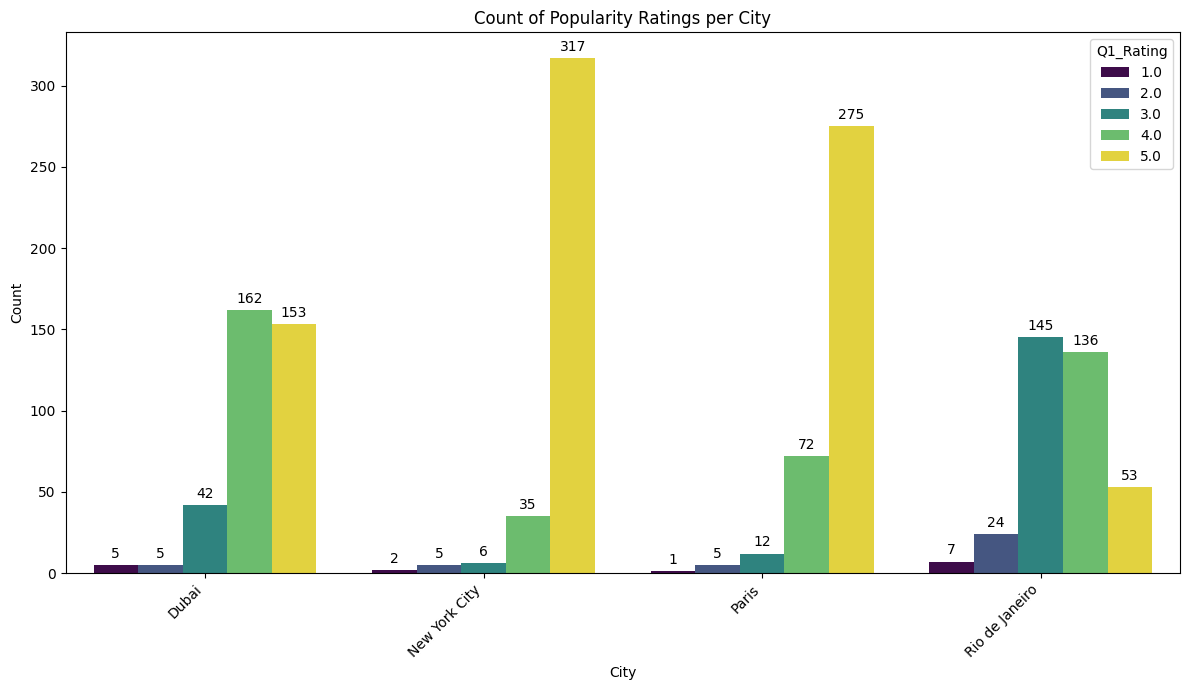

In [69]:
q1_counts = data.groupby(['Label', 'Q1']).size().reset_index(name='Count')
q1_counts.rename(columns={'Label': 'City', 'Q1': 'Q1_Rating'}, inplace=True)

avg_popularity_per_city = data.groupby('Label')['Q1'].mean()
print("\nAverage Popularity Rating per City:")
print(avg_popularity_per_city)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=q1_counts, x='City', y='Count', hue='Q1_Rating', palette='viridis', legend=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Count of Popularity Ratings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

New York and Paris show a high concentration of highest ratings (5s), whereas Dubai and Rio exhibit a more dispersed distribution across all rating levels. This suggests that Q1 may be a significant predictor for distinguishing high-consensus popular cities (New York and Paris) from those with more varied perceptions (Dubai and Rio).

#### Q2 (Social Media Virality)


Average Social Media Virality Rating per City:
Label
Dubai             3.405995
New York City     4.454795
Paris             3.358904
Rio de Janeiro    2.865385
Name: Q2, dtype: float64


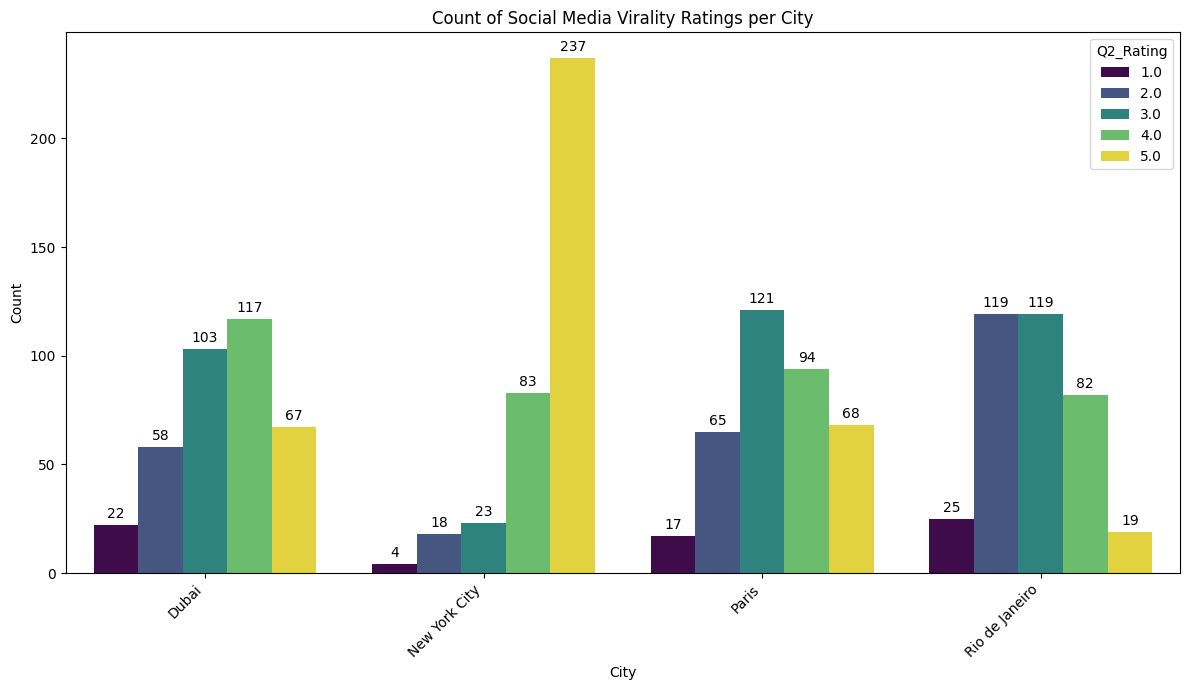

In [62]:
q2_counts = data.groupby(['Label', 'Q2']).size().reset_index(name='Count')
q2_counts.rename(columns={'Label': 'City', 'Q2': 'Q2_Rating'}, inplace=True)

avg_social_media_virality_per_city = data.groupby('Label')['Q2'].mean()
print("\nAverage Social Media Virality Rating per City:")
print(avg_social_media_virality_per_city)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=q2_counts, x='City', y='Count', hue='Q2_Rating', palette='viridis', legend=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Count of Social Media Virality Ratings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q3 (Architectural Uniqueness)


Average Architectural Uniqueness Rating per City:
Label
Dubai             4.027248
New York City     3.471233
Paris             4.224658
Rio de Janeiro    3.104396
Name: Q3, dtype: float64


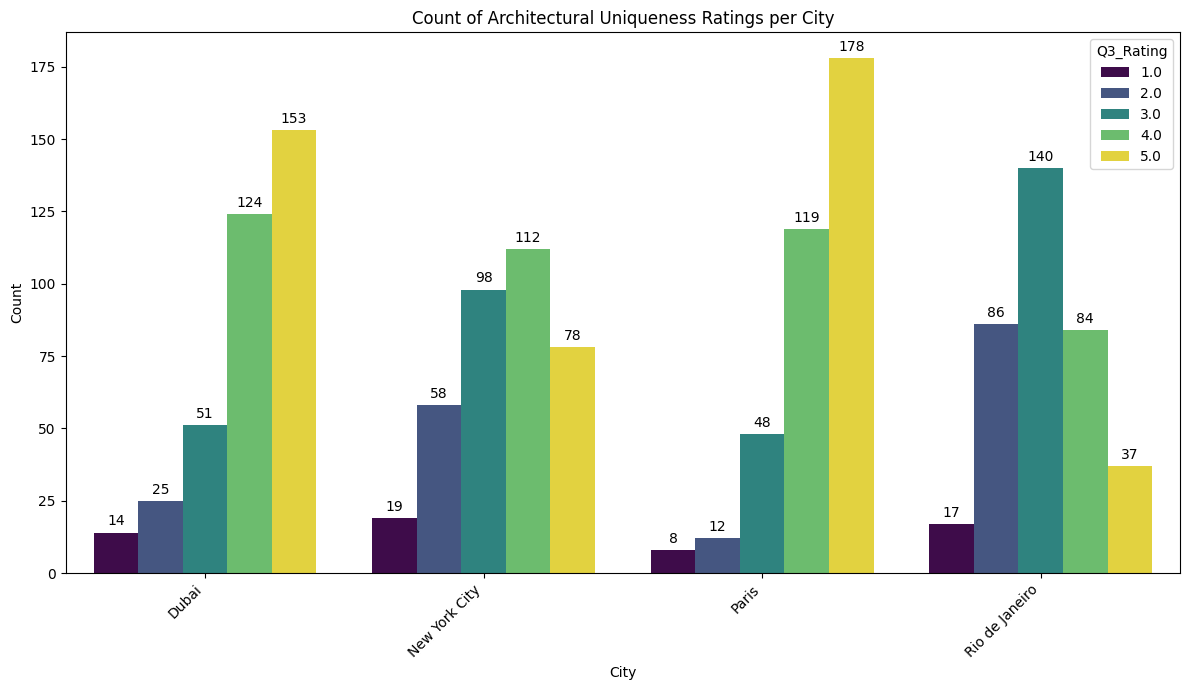

In [63]:
q3_counts = data.groupby(['Label', 'Q3']).size().reset_index(name='Count')
q3_counts.rename(columns={'Label': 'City', 'Q3': 'Q3_Rating'}, inplace=True)

avg_popularity_per_city = data.groupby('Label')['Q3'].mean()
print("\nAverage Architectural Uniqueness Rating per City:")
print(avg_popularity_per_city)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=q3_counts, x='City', y='Count', hue='Q3_Rating', palette='viridis', legend=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Count of Architectural Uniqueness Ratings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q4 (Street Party Enthusiasm)


Average Street Party Enthusiasm Rating per City:
Label
Dubai             2.768392
New York City     3.293151
Paris             3.052055
Rio de Janeiro    4.457534
Name: Q4, dtype: float64


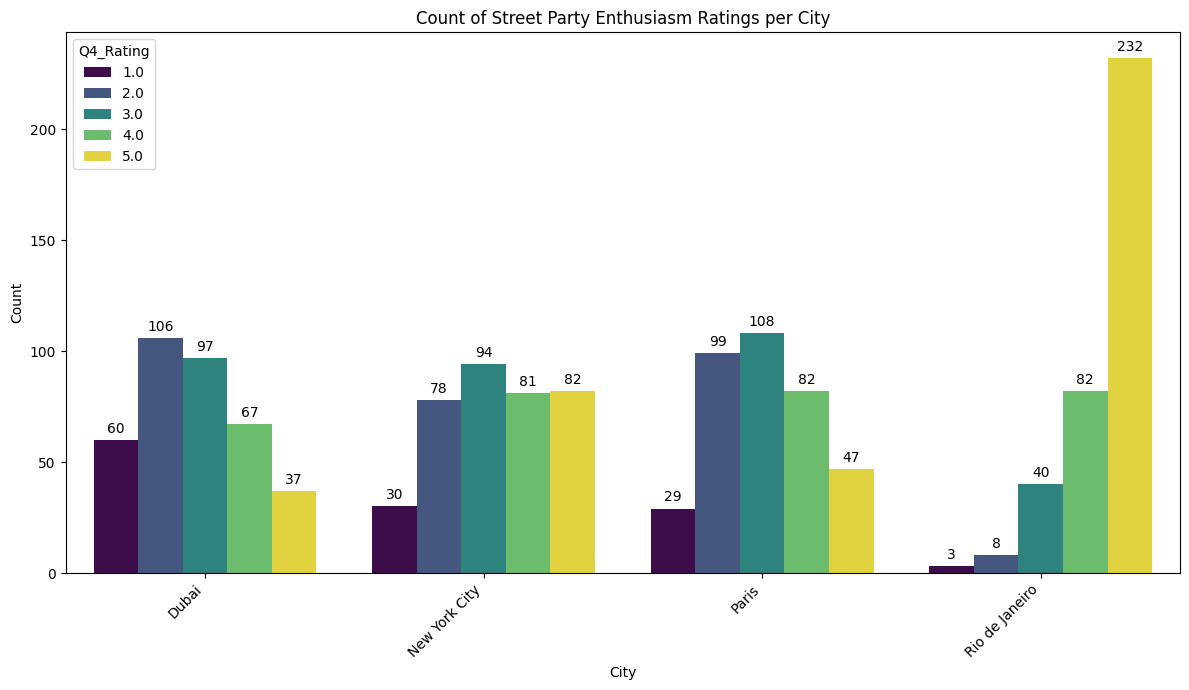

In [64]:
q4_counts = data.groupby(['Label', 'Q4']).size().reset_index(name='Count')
q4_counts.rename(columns={'Label': 'City', 'Q4': 'Q4_Rating'}, inplace=True)

avg_street_party_per_city = data.groupby('Label')['Q4'].mean()
print("\nAverage Street Party Enthusiasm Rating per City:")
print(avg_street_party_per_city)

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=q4_counts, x='City', y='Count', hue='Q4_Rating', palette='viridis', legend=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Count of Street Party Enthusiasm Ratings per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q5

Q5 asks who respondents would most likely travel with when visiting the city, choosing from a partner, friends, siblings, and co-workers. Similar to Q1–Q4, the counts for each relationship type per city will be displayed using a grouped bar chart

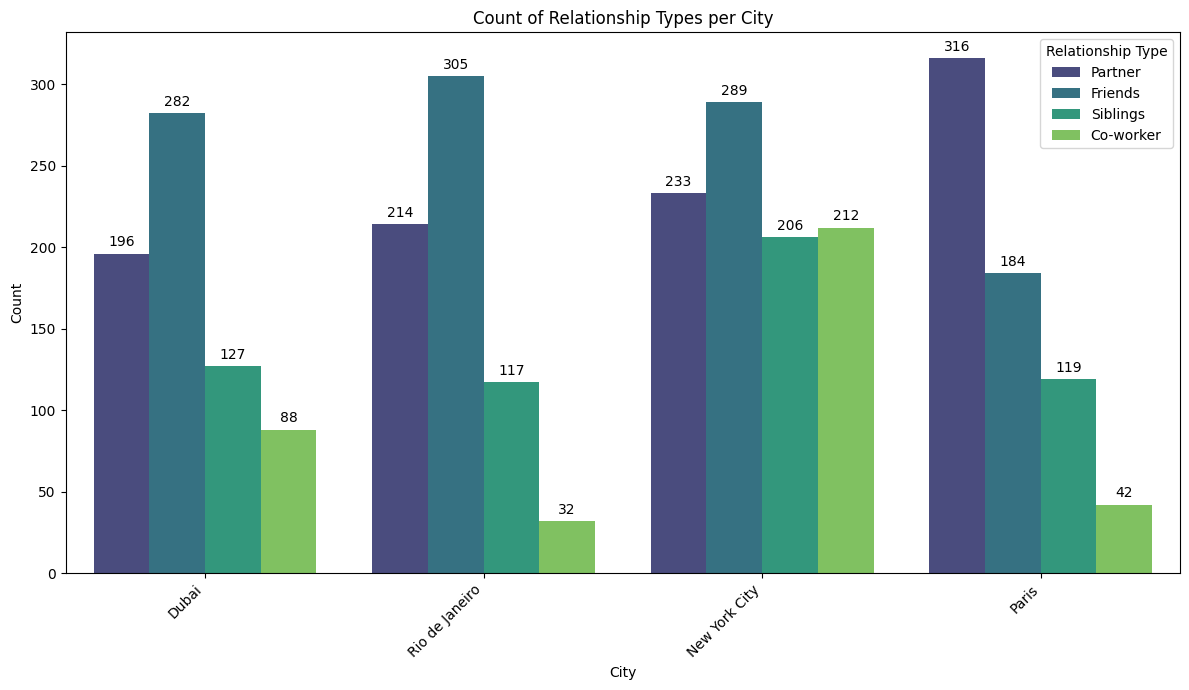

In [70]:
q5d = {"Dubai": {"Partner": 0, "Friends": 0, "Siblings": 0, "Co-worker": 0},
       "Rio de Janeiro": {"Partner": 0, "Friends": 0, "Siblings": 0, "Co-worker": 0},
       "New York City": {"Partner": 0, "Friends": 0, "Siblings": 0, "Co-worker": 0},
       "Paris": {"Partner": 0, "Friends": 0, "Siblings": 0, "Co-worker": 0}}

for i in range(len(data['Label'])):
  if not isinstance(data['Q5'][i], str):
    continue
  s = data['Q5'][i].split(",")
  for target in s:
    q5d[data['Label'][i]][target] += 1

df_q5 = pd.DataFrame(q5d).T
df_q5 = df_q5.reset_index().rename(columns={'index': 'City'})
df_q5_melted = pd.melt(df_q5, id_vars=['City'], var_name='Relationship Type', value_name='Count')

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_q5_melted, x='City', y='Count', hue='Relationship Type', palette='viridis', legend=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Count of Relationship Types per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Paris has the highest proportion of respondents choosing “partner,” while “friends” is the most frequently selected option for all other cities. Since respondents across all cities predominantly choose either “partner” or “friends,” Q5 is expected to contribute little to the model’s predictive power and may even introduce noise.

## Q7-Q9

Q7 to Q9 ask about the average temperature in January, the number of different languages one might overhear while walking through the city, and the number of fashion styles one might observe within a 10-minute walk. For these questions, summary statistics will be calculated to examine data skewness, and the distributions will be visualized using boxplots.

In [71]:
processed_q_data = data[['Q7', 'Q8', 'Q9', 'Label']].copy()

for col in ['Q7', 'Q9']:
    processed_q_data[col] = processed_q_data[col].astype(str).str.replace(',', '', regex=False).apply(pd.to_numeric, errors='coerce')
processed_q_data['Q8'] = pd.to_numeric(processed_q_data['Q8'], errors='coerce')

print("\nDescriptive Statistics for Q7, Q8, Q9")
for q_col in ['Q7', 'Q8', 'Q9']:
    print(f"\nStatistics for {q_col}:")
    print(processed_q_data[q_col].describe())

dubai_q_data = processed_q_data[processed_q_data['Label'] == 'Dubai']
rio_q_data = processed_q_data[processed_q_data['Label'] == 'Rio de Janeiro']
ny_q_data = processed_q_data[processed_q_data['Label'] == 'New York City']
paris_q_data = processed_q_data[processed_q_data['Label'] == 'Paris']

q_idx_to_col = {7: 'Q7', 8: 'Q8', 9: 'Q9'}


Descriptive Statistics for Q7, Q8, Q9

Statistics for Q7:
count     1461.000000
mean        21.771732
std        262.765201
min        -15.000000
25%          5.000000
50%         15.000000
75%         25.000000
max      10000.000000
Name: Q7, dtype: float64

Statistics for Q8:
count    1461.000000
mean        4.796030
std        22.142305
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       800.000000
Name: Q8, dtype: float64

Statistics for Q9:
count    1461.000000
mean       10.031485
std        30.834873
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      1000.000000
Name: Q9, dtype: float64


By comparing the mean and maximum values in the summary statistics (e.g., the maximum value in Q7 is 10,000 while the mean is only 21.8), we can identify the presence of extreme outliers in all three questions.

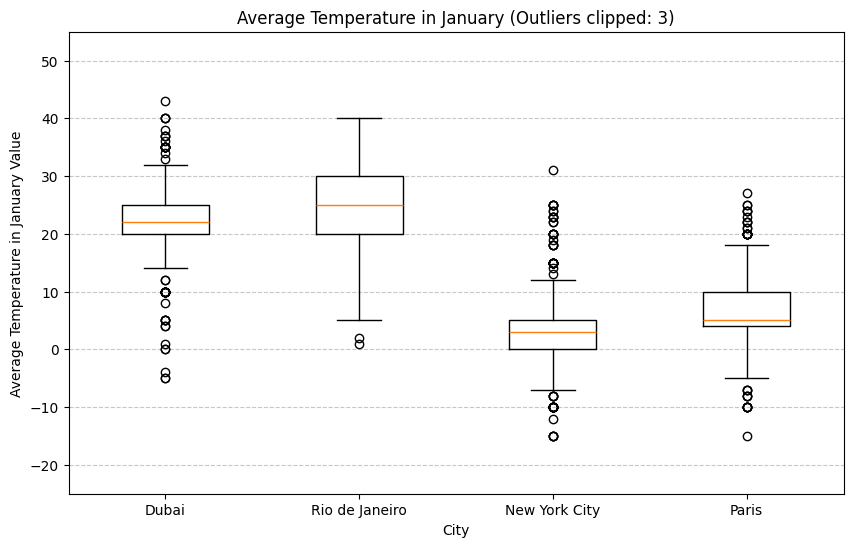

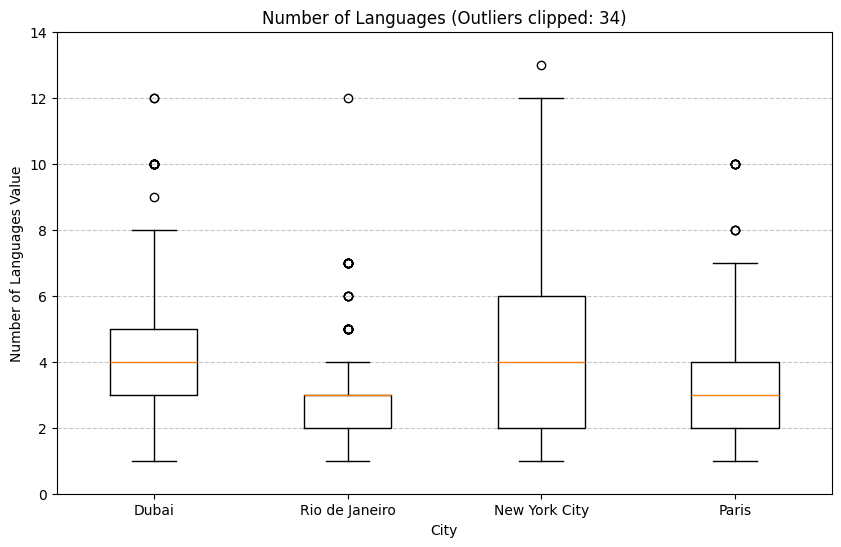

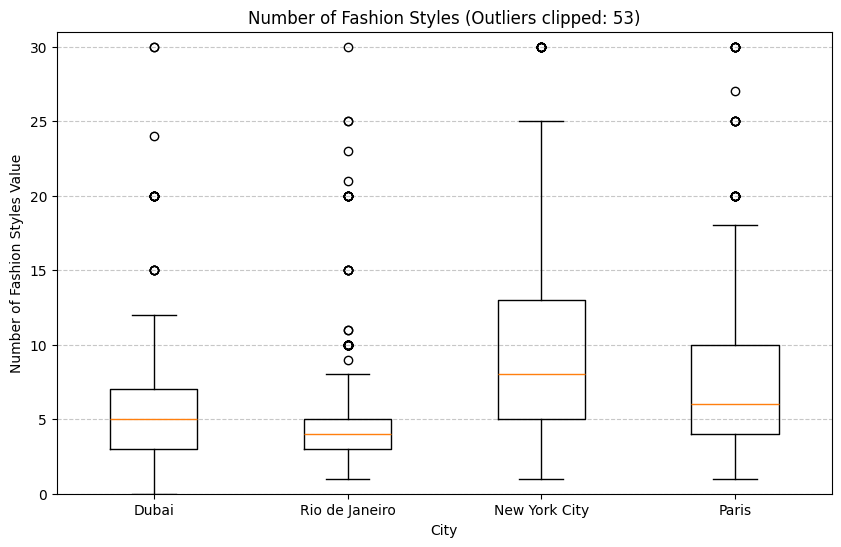

In [72]:
for q_idx in [7, 8, 9]:
  q_idx_to_descriptive_title = {
      7: 'Average Temperature in January',
      8: 'Number of Languages',
      9: 'Number of Fashion Styles'
  }
  descriptive_title = q_idx_to_descriptive_title.get(q_idx, f'Q{q_idx} Value')

  current_q_dubai = dubai_q_data[f'Q{q_idx}'].dropna().values
  current_q_rio = rio_q_data[f'Q{q_idx}'].dropna().values
  current_q_ny = ny_q_data[f'Q{q_idx}'].dropna().values
  current_q_paris = paris_q_data[f'Q{q_idx}'].dropna().values

  q_all_cities_data_valid = np.concatenate([current_q_dubai, current_q_rio, current_q_ny, current_q_paris])
  q_all_cities_data_valid = q_all_cities_data_valid[~np.isnan(q_all_cities_data_valid)]

  Q1 = np.percentile(q_all_cities_data_valid, 25)
  Q3 = np.percentile(q_all_cities_data_valid, 75)
  IQR = Q3 - Q1

  zoom_factor = 1.5
  if q_idx in [8, 9]:
      zoom_factor = 3.0

  lower_bound = Q1 - zoom_factor * IQR
  upper_bound = Q3 + zoom_factor * IQR

  if q_idx in [8, 9]:
      lower_bound = max(0, lower_bound)

  total_clipped_outliers = np.sum((q_all_cities_data_valid < lower_bound) | (q_all_cities_data_valid > upper_bound))

  q_data_for_plot = [current_q_dubai, current_q_rio, current_q_ny, current_q_paris]

  plt.figure(figsize=(10, 6))
  plt.boxplot(q_data_for_plot, tick_labels=['Dubai', 'Rio de Janeiro', 'New York City', 'Paris'], showfliers=True)
  plt.ylim(lower_bound, upper_bound)

  title_suffix = ""
  if total_clipped_outliers > 0:
      title_suffix = f" (Outliers clipped: {total_clipped_outliers})"

  plt.title(f"{descriptive_title}{title_suffix}")
  plt.xlabel("City")
  plt.ylabel(f"{descriptive_title} Value")
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()
  print("")

- Box plots were scaled to improve readability by focusing on each variable's core distribution, with clipped outlier counts indicated in the titles.

- Since Q7–Q9 involve free-entry numerical data, they exhibit significant variance. Consequently, constraining the data to the Interquartile Range (IQR) is expected to yield more stable and representative features for the model.

## Q10

In order to explore the words that best represent each city, we will tokenize the text, remove stopwords (e.g., “the,” “of,” “and”), and identify the most frequently occurring words in Q10 responses.

In [73]:
q10_words_by_city = {"Dubai": [], "New York City": [], "Paris": [], "Rio de Janeiro": []}
punctuation_pattern = r'[^a-zA-Z\s]'
stopwords = ['the', 'of', 'and', 'a', 'in', 'is', 'to', 'for', 'not', 'that',
             'are', 'you', 'where', 'its', 'im', 'city', 'i', 'me', 'we', 'they',
             'them', 'there', 'their', 'theres', 'no', 'dont', 'be', 'it', 'on',
             'with', 'this', 'as', 'by', 'at', 'or', 'from', 'but', 'can', 'has']

for index, row in data.iterrows():
    city = row['Label']
    q10_response = row['Q10']

    if isinstance(q10_response, str):
        cleaned_text = q10_response.lower()
        cleaned_text = re.sub(punctuation_pattern, '', cleaned_text)
        words = [word for word in cleaned_text.split() if word and word not in stopwords]

        q10_words_by_city[city].extend(words)


q10_word_frequencies = {}

for city, words_list in q10_words_by_city.items():
    q10_word_frequencies[city] = Counter(words_list)

print("\nTop 10 most frequent words per city:")
for city, frequencies in q10_word_frequencies.items():
    print(f"\nCity: {city}")
    top_words = frequencies.most_common(10)
    if top_words:
        for word, count in top_words:
            print(f"  - '{word}': {count}")
    else:
        print("  No words found.")


Top 10 most frequent words per city:

City: Dubai
  - 'dubai': 63
  - 'rich': 51
  - 'money': 44
  - 'habibi': 24
  - 'come': 23
  - 'world': 16
  - 'tallest': 15
  - 'burj': 15
  - 'oil': 15
  - 'khalifa': 14

City: New York City
  - 'new': 104
  - 'york': 90
  - 'dreams': 74
  - 'made': 62
  - 'concrete': 54
  - 'jungle': 45
  - 'never': 41
  - 'sleeps': 39
  - 'big': 25
  - 'apple': 20

City: Paris
  - 'love': 109
  - 'paris': 61
  - 'la': 21
  - 'tower': 21
  - 'oui': 20
  - 'eiffel': 19
  - 'baguette': 16
  - 'romance': 16
  - 'romantic': 15
  - 'world': 14

City: Rio de Janeiro
  - 'rio': 42
  - 'football': 33
  - 'life': 30
  - 'brazil': 22
  - 'de': 21
  - 'carnival': 20
  - 'janeiro': 20
  - 'soccer': 19
  - 'party': 17
  - 'beautiful': 17


The text analysis reveals that respondents hold distinct and city-specific perceptions. For example, the most frequently appearing words for Dubai are economically or financially related, such as “rich", “money”, and “oil”, while Paris is more strongly associated with sentimental words like “love” and “romance”. It is also notable that city names themselves, such as “dubai”, “rio” and “paris,” appear among the most frequent words. Although this may act as label leakage and artificially boost prediction accuracy, retaining them can be justified, as they reflect natural language patterns in the survey responses and this project prioritizes predictive performance.

# Data Preprocessing

## Q10 Processing (TF-IDF)

In [74]:
def _process_q10_features(data: pd.DataFrame, debug: bool = False):
  """
  Processes the 'Q10' column of the input DataFrame to create a TF-IDF matrix
  and a vocabulary list.

  Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Q10' column.

  Returns:
    tuple: A tuple containing:
      - q10_matrix (np.ndarray): The TF-IDF matrix for Q10 responses.
      - q10_lib (list): The vocabulary (list of unique cleaned words used by TF-IDF).
  """
  q10_texts = data['Q10']
  punctuation_pattern = r'[^a-zA-Z\s]'
  stopwords = ['the', 'of', 'and', 'a', 'in', 'is', 'to', 'for', 'not', 'that',
             'are', 'you', 'where', 'its', 'im', 'city', 'i', 'me', 'we', 'they',
             'them', 'there', 'their', 'theres', 'no', 'dont', 'be', 'it', 'on',
             'with', 'this', 'as', 'by', 'at', 'or', 'from', 'but', 'can', 'has']

  cleaned_q10_texts = []
  for response in q10_texts:
    if isinstance(response, str):
      cleaned_text = response.lower()
      cleaned_text = re.sub(punctuation_pattern, '', cleaned_text)
      words = [word for word in cleaned_text.split() if word and word not in stopwords]
      cleaned_q10_texts.append(' '.join(words))
    else:
      cleaned_q10_texts.append('')

  tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

  q10_matrix = tfidf_vectorizer.fit_transform(cleaned_q10_texts).toarray()

  q10_lib = tfidf_vectorizer.get_feature_names_out()
  if debug:
    print(f"Top 5 words extracted: {words[:5]}")

  return q10_matrix, q10_lib

## Q10 Processing (BoW)

In [75]:
def _process_q10_features_bow(data: pd.DataFrame, debug: bool = False):
  """
  Processes the 'Q10' column of the input DataFrame to create a Bag-of-Words matrix
  and a vocabulary list.

  Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Q10' column.

  Returns:
    tuple: A tuple containing:
      - q10_matrix (np.ndarray): The Bag-of-Words matrix for Q10 responses.
      - q10_lib (list): The vocabulary (list of unique cleaned words).
  """
  q10_texts = data['Q10']
  pattern = r"^[a-zA-Z0-9'\".,?!:;()]+$"
  pattern_clean = r"[\'\".?!:;()]"

  q10_tokenized = [str(w).lower().split() for w in q10_texts]
  q10_tokenized_unique = list(set([w for s in q10_tokenized for w in s]))
  q10_tokenized_unique_cleaned = [s for s in q10_tokenized_unique if re.match(pattern, s)]

  q10_lib = list(set([re.sub(pattern_clean, "", w) for w in q10_tokenized_unique_cleaned]))

  def vectorization_q10(s: str) -> list:
    """
    Vectorizes a single Q10 response using the q10_lib vocabulary (Bag-of-Words).
    """
    tokenized = str(s).lower().split()
    tokenized_cleaned = [s for s in tokenized if re.match(pattern, s)]
    tokenized_cleaned_again = [re.sub(pattern_clean, "", w) for w in tokenized_cleaned]
    return [1 if w in tokenized_cleaned_again  else 0 for w in q10_lib]

  q10_matrix = np.array([vectorization_q10(q10_texts[i]) for i in range(len(q10_texts))])

  return q10_matrix, q10_lib

## Q6 Processing

In [76]:
def _process_q6_features(data: pd.DataFrame, debug: bool = False) -> list:
  """
  Extracts numerical ranks from the Q6 column of the input DataFrame.

  Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Q6' column.
    debug (bool): If True, prints messages for invalid data formats.

  Returns:
    list: A list of lists, where each inner list contains numerical ranks
          for a specific Q6 category across all responses. Invalid entries are -1.
  """
  q6_numerical = [[], [], [], [], [], []]
  expected_q6_len = len("Skyscrapers=>6,Sport=>1,Art and Music=>3,Carnival=>3,Cuisine=>3,Economic=>3")

  for i in range(len(data['id'])):
    q6_str = str(data['Q6'][i])
    if len(q6_str) != expected_q6_len:
      if debug: print(f'Invalid data format: {q6_str} in row {i}')
      for j in range(6): q6_numerical[j].append(-1)
    else:
      for idx, pos in enumerate([13, 22, 39, 51, 62, 74]):
        q6_numerical[idx].append(int(q6_str[pos]))
  return q6_numerical

## Feature Stacking

In [77]:
def _stack_initial_features(data: pd.DataFrame, q6_numerical: list, q10_matrix: np.ndarray):
  """
  Stacks Q1-Q9 features (including Q5 breakdown) and Q6 numerical ranks, then appends
  Q10 vectorized features to create initial data_fets and target.

  Parameters:
    data (pd.DataFrame): The input DataFrame containing survey responses.
    q6_numerical (list): A list of lists containing numerical Q6 ranks.
    q10_matrix (np.ndarray): The vectorized Q10 features.

  Returns:
    tuple: A tuple containing:
      - data_fets (numpy.ndarray): The stacked feature matrix.
      - target (numpy.ndarray): The target variable array.
  """
  data_fets = np.stack([
      data['Q1'], data['Q2'], data['Q3'], data['Q4'],
      [int('Partner' in str(x)) for x in data['Q5']],
      [int('Friends' in str(x)) for x in data['Q5']],
      [int('Siblings' in str(x)) for x in data['Q5']],
      [int('Co-worker' in str(x)) for x in data['Q5']],
      q6_numerical[0], q6_numerical[1], q6_numerical[2], q6_numerical[3], q6_numerical[4], q6_numerical[5],
      data['Q7'], data['Q8'], data['Q9']
  ], axis = 1)

  target = np.stack([data['Label']], axis = 1)

  for i in range(0, q10_matrix.shape[1]):
    data_fets = np.append(data_fets, np.array([q10_matrix[:,i]]).T, axis = 1)

  return data_fets, target

## Handling Missing Values and Format Errors

In [78]:
def _clean_data_format_errors(data_fets: np.ndarray, q10_matrix: np.ndarray, target: np.ndarray, debug: bool = False):
  """
  Removes responses with format errors from data_fets, q10_matrix, and target arrays.

  Parameters:
    data_fets (np.ndarray): The feature matrix.
    q10_matrix (np.ndarray): The Q10 vectorized features matrix.
    target (np.ndarray): The target variable array.
    debug (bool): If True, prints messages for invalid data formats.

  Returns:
    tuple: A tuple containing the cleaned data_fets, q10_matrix, and target arrays.
  """
  def valid_data(v) -> bool:
    """
    Checks if a data vector (response) has valid formats for Q1-Q9
    """
    for i in [0, 1, 2, 3]:
      if v[i] not in [1, 2, 3, 4, 5]:
        if debug: print(f"Can't process Q{i+1}: {v}")
        return False
    if (v[4] + v[5] + v[6] + v[7]) == 0:
      if debug: print(f"Can't process Q5: {v}")
      return False
    for i in [8, 9, 10, 11, 12, 13]:
      if v[i] not in [1, 2, 3, 4, 5, 6]:
        if debug: print(f"Can't process Q6: {v}")
        return False
    for i in [14, 15, 16]:
      try:
        if np.isnan(float(v[i])):
          if debug: print(f"Can't process Q{i-7}: {v}")
          return False
      except:
        if debug: print(f"Can't process Q{i-7}: {v}")
        return False
    return True

  step1_invalid = 0
  i = 0
  if debug: print(".                  Q1. Q2. Q3. Q4. Q5.     Q6.         Q7-9")
  while i < len(data_fets):
    if not valid_data(data_fets[i]):
      data_fets = np.delete(data_fets, (i), axis=0)
      q10_matrix = np.delete(q10_matrix, (i), axis=0)
      target = np.delete(target, (i), axis = 0)
      step1_invalid += 1
      continue
    i += 1

  for i in range(len(data_fets)):
    if not valid_data(data_fets[i]): print("ERROR!!") # Should not happen if cleaning is correct
    for j in [14, 15, 16]:
      data_fets[i][j] = float(data_fets[i][j])
  if debug:
    print(f"There are {step1_invalid} response with format error")

  return data_fets, q10_matrix, target

## Handling Outliers

In [80]:
def _clean_data_outliers(data_fets: np.ndarray, q10_matrix: np.ndarray, target: np.ndarray, refine: bool = True, debug: bool = False):
  """
  Removes outliers from Q7 - Q9 in data_fets, q10_matrix, and target arrays.

  Parameters:
    data_fets (np.ndarray): The feature matrix.
    q10_matrix (np.ndarray): The Q10 vectorized features matrix.
    target (np.ndarray): The target variable array.
    refine (bool): If True, deletes outliers based on defined criteria.
    debug (bool): If True, prints messages for invalid data formats.

  Returns:
    tuple: A tuple containing the cleaned data_fets, q10_matrix, and target arrays.
  """
  def q789_outliers(data_fets_local, threshold, debug: bool = False):
    q7_mean, q7_std = np.mean(data_fets_local[:,14]), np.std(data_fets_local[:,14])
    q8_mean, q8_std = np.mean(data_fets_local[:,15]), np.std(data_fets_local[:,15])
    q9_mean, q9_std = np.mean(data_fets_local[:,16]), np.std(data_fets_local[:,16])

    q7_lower, q7_upper = ((-threshold) * q7_std + q7_mean), (threshold * q7_std + q7_mean)
    q8_lower, q8_upper = ((-threshold) * q8_std + q8_mean), (threshold * q8_std + q8_mean)
    q9_lower, q9_upper = ((-threshold) * q9_std + q9_mean), (threshold * q9_std + q9_mean)

    if debug:
      print("Outlier bounds")
      print(f"Q7: {round(q7_lower, 4)} < x < {round(q7_upper, 4)}")
      print(f"Q8: {round(q8_lower, 4)} < x < {round(q8_upper, 4)}")
      print(f"Q9: {round(q9_lower, 4)} < x < {round(q9_upper, 4)}")

  def refine_data(v):
    if not (-50 <= float(v[14]) <= 50): return False
    if not (0 < float(v[15]) < 50): return False
    if not (0 < float(v[16]) < 50): return False
    return True

  q789_outliers(data_fets, 3)

  if refine:
    step2_invalid = 0
    i = 0

    while i < len(data_fets):
      if not refine_data(data_fets[i]):
        if debug: print(f"{target[i][0]}: {data_fets[i]}")
        data_fets = np.delete(data_fets, (i), axis=0)
        q10_matrix = np.delete(q10_matrix, (i), axis=0)
        target = np.delete(target, (i), axis = 0)
        step2_invalid += 1
        continue
      i += 1
    if debug:
      print(f"\n----------\nThere are {step2_invalid} response with outlier values")
      print("Shape of the feature matrix:", data_fets.shape)
      print("Shape of the target vector:", target.shape)
      print("\nUpdated outlier bounds after refinement")

    q789_outliers(data_fets, 3)

  return data_fets, q10_matrix, target

## Feature Selection

In [81]:
def _select_and_normalize_features(data_fets: np.ndarray,
                                   q10_matrix: np.ndarray,
                                   include_q1: bool,
                                   include_q2: bool,
                                   include_q3: bool,
                                   include_q4: bool,
                                   include_q5: bool,
                                   include_q6: bool,
                                   include_q7: bool,
                                   include_q8: bool,
                                   include_q9: bool,
                                   include_q10: bool,
                                   normalize_q6_internal: bool = False,
                                   normalize_features_general: bool = False):
  """
  Selects features from data_fets and q10_matrix, and optionally normalizes them.

  Parameters:
    data_fets (np.ndarray): The initial feature matrix containing Q1-Q9 features.
    q10_matrix (np.ndarray): The vectorized Q10 features matrix.
    include_q1 (bool), ..., include_q10 (bool): Flags to include respective feature sets.
    normalize_q6_internal (bool): If True, applies internal normalization to Q6 ranks (as in original code).
    normalize_features_general (bool): If True, applies general standardization to numerical features in final_data.

  Returns:
    tuple: A tuple containing:
      - final_data (np.ndarray): The selected and optionally normalized feature matrix.
      - feature_names (list): List of names of the selected features.
  """
  q6_normalized = None
  if normalize_q6_internal:
    q6_np = np.stack([data_fets[:,x] for x in range(8, 14)]).T
    q6_mean = np.mean(q6_np, axis = 1)
    q6_mean[q6_mean == 0] = 1.0
    q6_mean_offset = 3.5/q6_mean
    q6_normalized = np.np * q6_mean_offset.reshape(-1, 1)

  feature_names = []
  final_data = np.empty([len(data_fets),0])

  if include_q1:
    final_data = np.append(final_data, np.array([data_fets[:,0]]).T, axis = 1)
    feature_names.append("Q1")
  if include_q2:
    final_data = np.append(final_data, np.array([data_fets[:,1]]).T, axis = 1)
    feature_names.append("Q2")
  if include_q3:
    final_data = np.append(final_data, np.array([data_fets[:,2]]).T, axis = 1)
    feature_names.append("Q3")
  if include_q4:
    final_data = np.append(final_data, np.array([data_fets[:,3]]).T, axis = 1)
    feature_names.append("Q4")
  if include_q5:
    for i in range(4, 8): final_data = np.append(final_data, np.array([data_fets[:,i]]).T, axis = 1)
    feature_names.extend(["Q5_partner", "Q5_friends", "Q5_siblings", "Q5_coworker"])
  if include_q6:
    if normalize_q6_internal:
      for i in range(6): final_data = np.append(final_data, np.array([q6_normalized[:,i]]).T, axis = 1)
    else:
      for i in range(8, 14): final_data = np.append(final_data, np.array([data_fets[:,i]]).T, axis = 1)
    feature_names.extend(["Q6_skycrapers1", "Q6_sport1", "Q6_artmusic1", "Q6_carnival1", "Q6_cuisine1", "Q6_economics1"])
  if include_q7:
    final_data = np.append(final_data, np.array([data_fets[:,14]]).T, axis = 1)
    feature_names.append("Q7")
  if include_q8:
    final_data = np.append(final_data, np.array([data_fets[:,15]]).T, axis = 1)
    feature_names.append("Q8")
  if include_q9:
    final_data = np.append(final_data, np.array([data_fets[:,16]]).T, axis = 1)
    feature_names.append("Q9")
  if include_q10:
    for i in range(q10_matrix.shape[1]): final_data = np.append(final_data, np.array([q10_matrix[:,i]]).T, axis = 1)
    feature_names.extend([f"Q10_word_{i}" for i in range(q10_matrix.shape[1])])

  if normalize_features_general:
    numerical_feature_indices = []
    for idx, name in enumerate(feature_names):
        if not (name.startswith("Q5_") or name.startswith("Q10_word_")):
            numerical_feature_indices.append(idx)

    if len(numerical_feature_indices) > 0:
      final_data_numerical_part = final_data[:, numerical_feature_indices].astype(float)

      mean = np.mean(final_data_numerical_part, axis=0)
      std = np.std(final_data_numerical_part, axis=0)
      std[std == 0] = 1.0

      final_data[:, numerical_feature_indices] = (final_data_numerical_part - mean) / std

  return final_data, feature_names

## Orchestration Function

In [82]:
def process_data(data: pd.DataFrame,
                 include_q1: bool = True, include_q2: bool = True, include_q3: bool = True, include_q4: bool = True,
                 include_q5: bool = True, include_q6: bool = True, include_q7: bool = True, include_q8: bool = True,
                 include_q9: bool = True, include_q10: bool = True,
                 normalize_q6: bool = False,
                 normalize_features_general: bool = False,
                 debug: bool = False,
                 refine: bool = True):
  """
  This function orchestrates the entire data preprocessing pipeline by calling various helper functions to extract,
  clean, select, and optionally normalize features from the raw dataset.

  Parameters:
    data (pd.DataFrame): The raw input DataFrame.
    include_q1 (bool), ..., include_q10 (bool): Flags to determine which feature sets to include.
    normalize_q6 (bool): Flag for internal Q6 normalization.
    normalize_features_general (bool): Flag for general numerical feature standardization.
    debug (bool): Flag to enable debug prints in helper functions.
    refine (bool): Flag to enable outlier removal in _clean_data_outliers.

  Returns:
    tuple: A tuple containing:
      - features (np.ndarray): The final processed feature matrix.
      - target (np.ndarray): The target variable array.
      - feature_names (list): List of names of the selected features.
  """
  q10_matrix, q10_lib = _process_q10_features(data, debug=debug)
  q6_numerical = _process_q6_features(data, debug=debug)
  data_fets, target = _stack_initial_features(data, q6_numerical, q10_matrix)
  data_fets, q10_matrix, target = _clean_data_format_errors(data_fets, q10_matrix, target, debug=debug)
  data_fets, q10_matrix, target = _clean_data_outliers(data_fets, q10_matrix, target, refine=refine, debug=debug)
  features, feature_names = _select_and_normalize_features(
      data_fets, q10_matrix,
      include_q1, include_q2, include_q3, include_q4, include_q5, include_q6, include_q7, include_q8, include_q9, include_q10,
      normalize_q6_internal=normalize_q6, normalize_features_general=normalize_features_general
  )

  return features, target, feature_names

## Data Split

In [83]:
def _split_data(features: np.ndarray, target: np.ndarray,
                train_ratio: float = 0.8, valid_ratio: float = 0.15, test_ratio: float = 0.05,
                random_state: int = 1):
  """
  Splits the feature and target data into training, validation, and test sets.

  Parameters:
    features (np.ndarray): The feature matrix (X).
    target (np.ndarray): The target variable array (t).
    train_ratio (float): Proportion of the dataset to include in the train split.
    valid_ratio (float): Proportion of the dataset to include in the validation split.
    test_ratio (float): Proportion of the dataset to include in the test split.
    random_state (int): Controls the shuffling applied to the data before applying the split.

  Returns:
    tuple: A tuple containing X_train, X_valid, X_test, t_train, t_valid, t_test.
  """
  if not np.isclose(train_ratio + valid_ratio + test_ratio, 1.0):
      raise ValueError("Train, validation, and test ratios must sum to 1.0")

  X_tv, X_test, t_tv, t_test = train_test_split(
      features, target, test_size=test_ratio, random_state=random_state)

  valid_size_relative = valid_ratio / (train_ratio + valid_ratio)

  X_train, X_valid, t_train, t_valid = train_test_split(
      X_tv, t_tv, test_size=valid_size_relative, random_state=random_state)

  return X_train, X_valid, X_test, t_train, t_valid, t_test

## Data Preparation

In [84]:
# Feature inclusion flags
include_q1 = True
include_q2 = True
include_q3 = True
include_q4 = True
include_q5 = True
include_q6 = True
include_q7 = True
include_q8 = True
include_q9 = True
include_q10 = True

# Normalization flags
normalize_q6 = False
normalize_features_general = True

# Preprocessing
features, target, feature_names = process_data(
    data, include_q1, include_q2, include_q3, include_q4, include_q5, include_q6,
    include_q7, include_q8, include_q9, include_q10, normalize_q6, normalize_features_general,
    debug=False, refine=True)

# Data Split
X_train, X_valid, X_test, t_train, t_valid, t_test = _split_data(features, target,
                                                                 train_ratio=0.8, valid_ratio=0.15,
                                                                 test_ratio=0.05,random_state=99)

unique_classes, class_counts = np.unique(t_train, return_counts=True)

print(f"Shape of training set: {X_train.shape}")
print(f"Shape of validation set: {X_valid.shape}")
print(f"Shape of test set: {X_test.shape}\n")
print("Training data class distribution:")
for i in range(len(unique_classes)):
  print(f"{unique_classes[i]}: {class_counts[i]} samples")

# Label Encoding
label_map = {"Dubai": 0,
             "New York City": 1,
             "Rio de Janeiro": 2,
             "Paris": 3}

t_train_encoded = np.array([label_map[city[0]] for city in t_train])
t_valid_encoded = np.array([label_map[city[0]] for city in t_valid])
t_test_encoded = np.array([label_map[city[0]] for city in t_test])



Shape of training set: (1124, 37)
Shape of validation set: (211, 37)
Shape of test set: (71, 37)

Training data class distribution:
Dubai: 283 samples
New York City: 268 samples
Paris: 286 samples
Rio de Janeiro: 287 samples


## Correlation Heatmap (Q1-Q9)

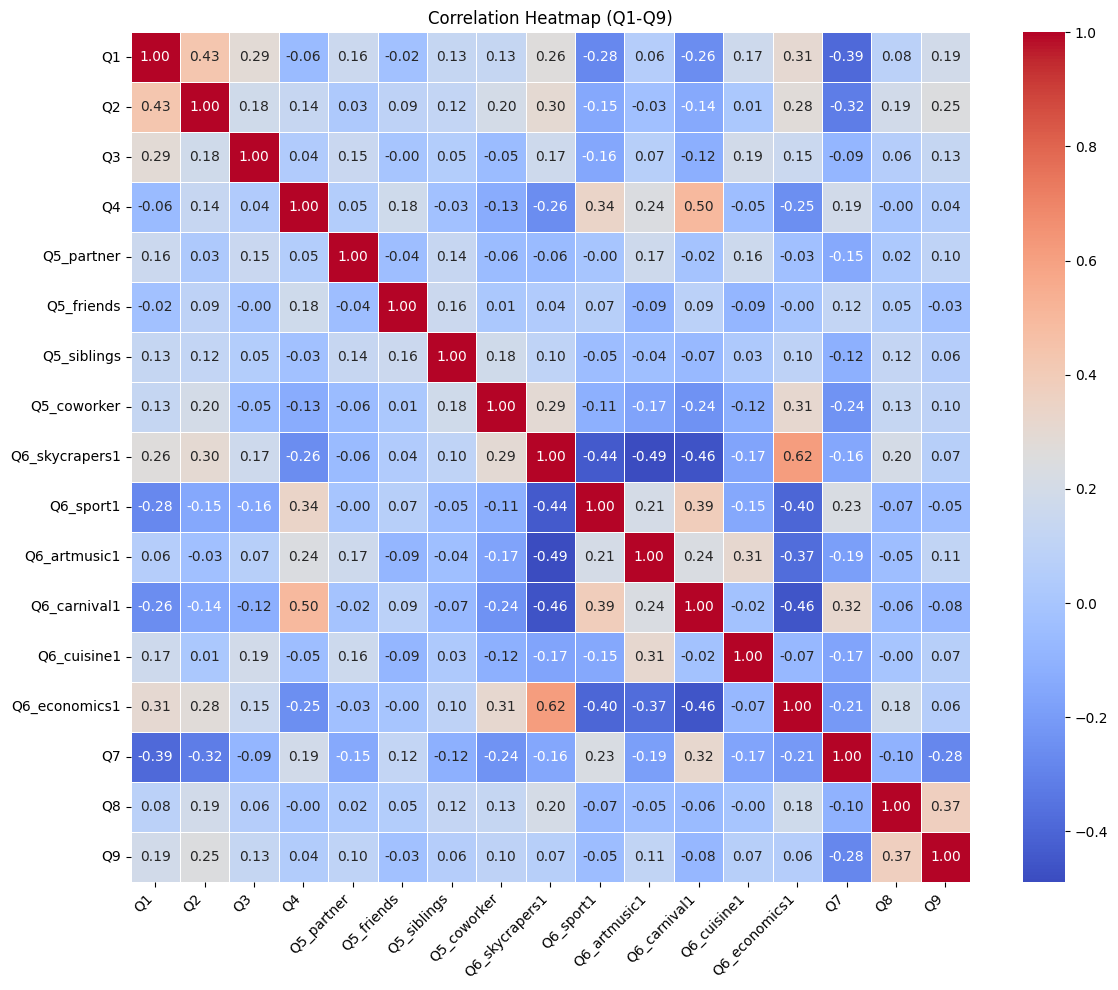

In [85]:
feat_heat, tar_heat, name_heat = process_data(
    data, include_q1, include_q2, include_q3, include_q4, include_q5, include_q6,
    include_q7, include_q8, include_q9, include_q10=False, normalize_q6=False,
    normalize_features_general=False, debug=False, refine=True)

numeric_data_cleaned = pd.DataFrame(feat_heat, columns=name_heat)
correlation_matrix = numeric_data_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap (Q1-Q9)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*   The highest absolute correlation observed (0.62) is well below typical thresholds for severe multicollinearity (0.8-0.9). This is highly beneficial, as it ensures numerical stability and reliable coefficient interpretations, particularly for linear models. It also helps in preventing inflated standard errors in parameter estimates.

*   The dominance of weak to moderate correlations across most feature pairs suggests that the selected features largely convey independent information. This broadens the predictive signals available to the models, potentially enhancing their ability to learn complex relationships without features competing too much or redundantly encoding the same underlying variance.

*   Given the lack of extreme multicollinearity, there's less immediate pressure to aggressively prune features based solely on their inter-correlations. This allows for a richer feature set to be considered by various models, including tree-based methods and neural networks, without significant concerns about redundant feature subsets hindering training or interpretability for those specific model types.





# Model Training and Evaluation (Baseline Models)

The main objective of this section is to explore different models and identify the best-performing ones. Model performance will be evaluated using training accuracy, validation accuracy, per-class precision, recall, F1-score, and analysis of confusion matrices on the validation set.

## K-Nearest Neighbor

KNN Classifier Training Accuracy: 0.9048
KNN Classifier Validation Accuracy: 0.9005

Classification Report:
                 precision    recall  f1-score   support

         Dubai       0.86      0.86      0.86        56
 New York City       0.95      0.88      0.91        59
Rio de Janeiro       0.94      0.96      0.95        50
         Paris       0.86      0.91      0.88        46

      accuracy                           0.90       211
     macro avg       0.90      0.90      0.90       211
  weighted avg       0.90      0.90      0.90       211



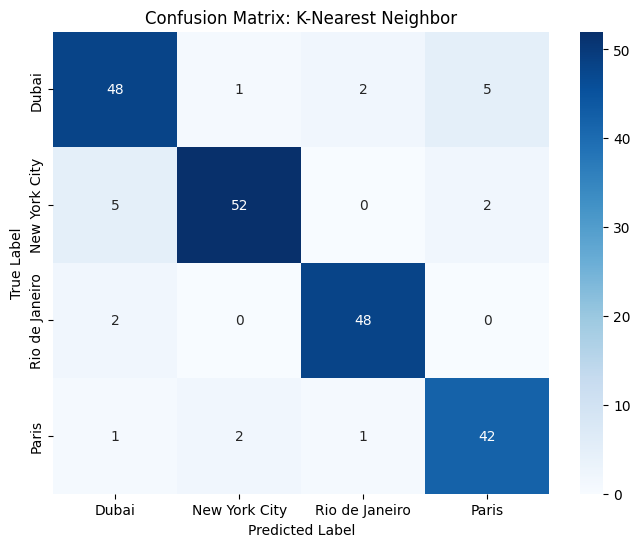

In [14]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, t_train_encoded)
pred_knn_train = model_knn.predict(X_train)
pred_knn_valid = model_knn.predict(X_valid)
accuracy_knn_train = accuracy_score(t_train_encoded, pred_knn_train)
accuracy_knn_valid = accuracy_score(t_valid_encoded, pred_knn_valid)

print(f"KNN Classifier Training Accuracy: {accuracy_knn_train:.4f}")
print(f"KNN Classifier Validation Accuracy: {accuracy_knn_valid:.4f}")
print("\nClassification Report:\n", classification_report(t_valid_encoded, pred_knn_valid, target_names=label_map.keys()))

cm_knn = confusion_matrix(t_valid_encoded, pred_knn_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: K-Nearest Neighbor")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The K-Nearest Neighbors (KNN) classifier demonstrates strong performance. It achieved a training accuracy of 0.9048 and a validation accuracy of 0.9005, suggesting good generalization without significant overfitting. Per-class metrics indicate high precision, recall, and F1-scores for all four cities, with New York City and Rio de Janeiro showing particularly strong classification. The confusion matrix reveals a few misclassifications, mainly between Dubai and Paris, and New York City with Dubai or Paris, but overall, the model effectively distinguishes between the cities.

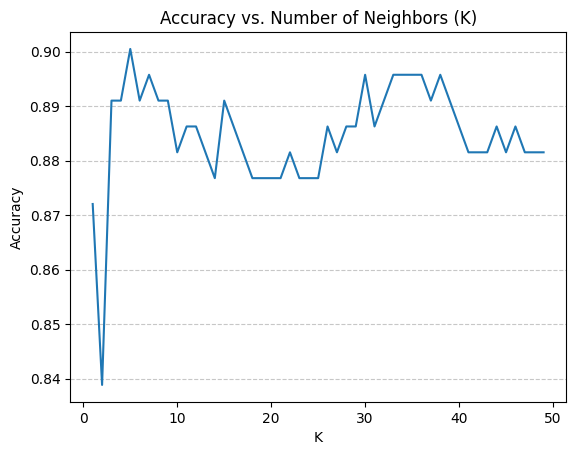

In [15]:
# Optimal K

validation_acc = []

for i in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, t_train_encoded)
  validation_acc.append(knn.score(X_valid, t_valid_encoded))

plt.title("Accuracy vs. Number of Neighbors (K)")
plt.plot(range(1, 50), validation_acc)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Decision Tree

Decision Tree Classifier Training Accuracy: 1.0000
Decision Tree Classifier Validation Accuracy: 0.8294

Classification Report:
                 precision    recall  f1-score   support

         Dubai       0.85      0.82      0.84        56
 New York City       0.81      0.85      0.83        59
Rio de Janeiro       0.88      0.88      0.88        50
         Paris       0.78      0.76      0.77        46

      accuracy                           0.83       211
     macro avg       0.83      0.83      0.83       211
  weighted avg       0.83      0.83      0.83       211



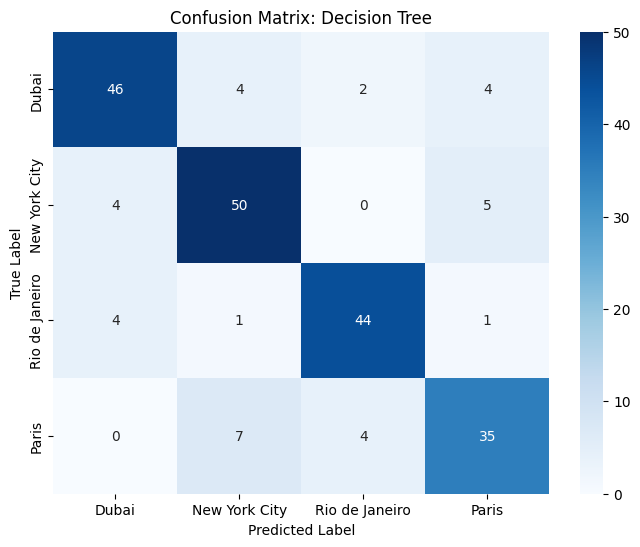

In [16]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, t_train_encoded)
pred_tree_train = model_tree.predict(X_train)
pred_tree_valid = model_tree.predict(X_valid)
accuracy_tree_train = accuracy_score(t_train_encoded, pred_tree_train)
accuracy_tree_valid = accuracy_score(t_valid_encoded, pred_tree_valid)

print(f"Decision Tree Classifier Training Accuracy: {accuracy_tree_train:.4f}")
print(f"Decision Tree Classifier Validation Accuracy: {accuracy_tree_valid:.4f}")
print("\nClassification Report:\n", classification_report(t_valid_encoded, pred_tree_valid, target_names=label_map.keys()))

cm_tree = confusion_matrix(t_valid_encoded, pred_tree_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The Decision Tree Classifier achieved a perfect training accuracy of 1.0000, but its validation accuracy was notably lower at 0.8294. This significant difference suggests that the model is overfitting to the training data. The classification report shows decent precision, recall, and F1-scores across classes, generally ranging from 0.76 to 0.88. The confusion matrix indicates several misclassifications, particularly for Paris and Dubai, where the model struggles to differentiate them cleanly. For instance, some Paris instances are misclassified as New York City and Dubai, and some Dubai instances are misclassified as New York City and Paris.



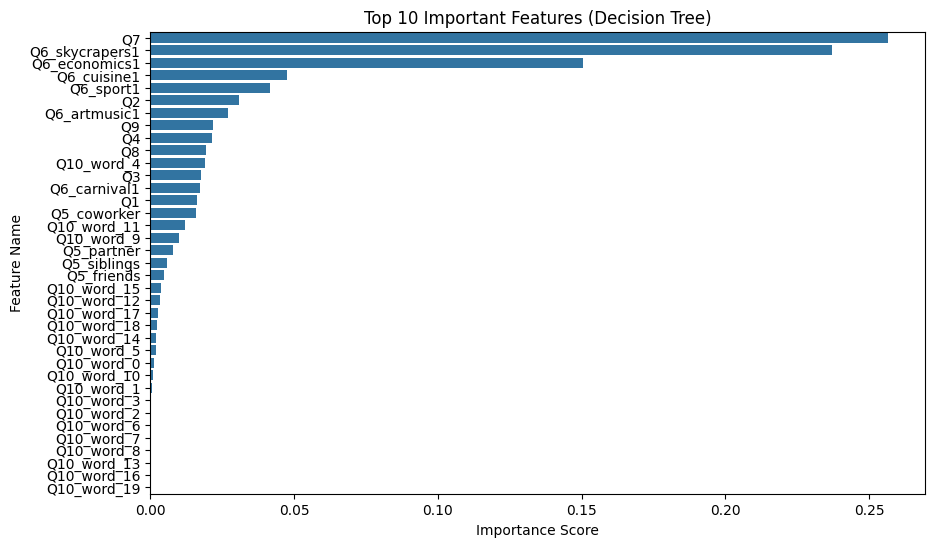

In [17]:
# Decision Tree Feature Importance
importances = model_tree.feature_importances_
tree_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=tree_importances.values, y=tree_importances.index)
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

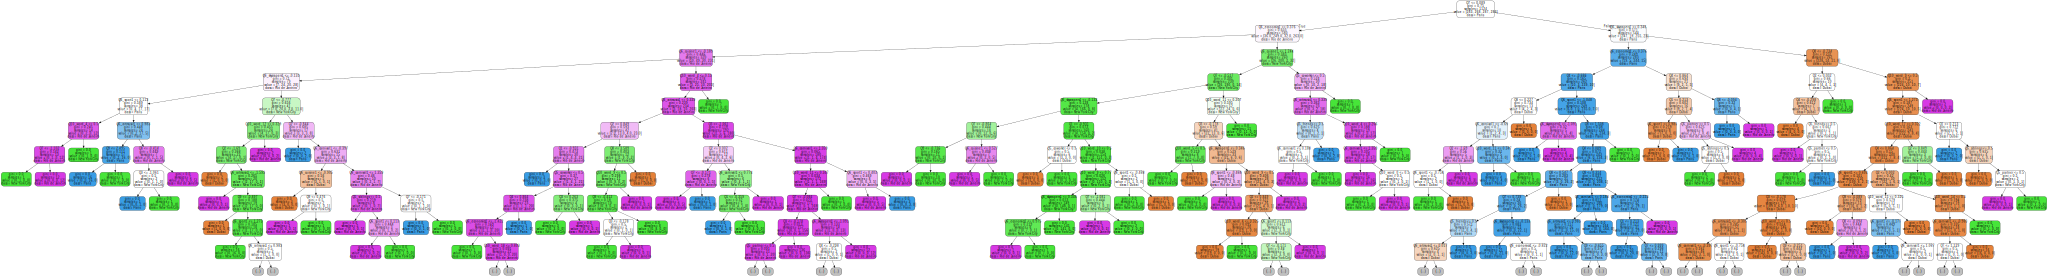

In [18]:
# Visualization of Decision Tree
def visualize_tree(model, max_depth=10):
  return display(graphviz.Source(
      treeViz.export_graphviz(
          model,
          feature_names=feature_names,
          max_depth=max_depth,
          class_names=np.unique(t_train).astype(str),
          filled=True,
          rounded=True
          )
      )
  )

visualize_tree(model_tree)

## Multinomial Logistic Regression

Multinomial Logistic Regression Training Accuracy: 0.9377
Multinomial Logistic Regression Validation Accuracy: 0.9384

Classification Report:
                 precision    recall  f1-score   support

         Dubai       0.93      0.89      0.91        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.92      0.96      0.94        50
         Paris       0.92      1.00      0.96        46

      accuracy                           0.94       211
     macro avg       0.94      0.94      0.94       211
  weighted avg       0.94      0.94      0.94       211

[[50  1  3  2]
 [ 3 54  1  1]
 [ 1  0 48  1]
 [ 0  0  0 46]]


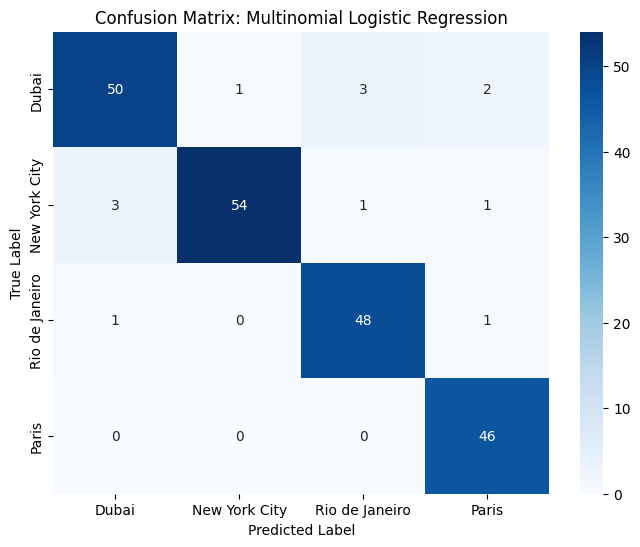

In [36]:
model_mlr = LogisticRegression(random_state=42)
model_mlr.fit(X_train, t_train_encoded)
pred_mlr_train = model_mlr.predict(X_train)
pred_mlr_valid = model_mlr.predict(X_valid)
accuracy_mlr_train = accuracy_score(t_train_encoded, pred_mlr_train)
accuracy_mlr_valid = accuracy_score(t_valid_encoded, pred_mlr_valid)

print(f"Multinomial Logistic Regression Training Accuracy: {accuracy_mlr_train:.4f}")
print(f"Multinomial Logistic Regression Validation Accuracy: {accuracy_mlr_valid:.4f}")
print("\nClassification Report:\n", classification_report(t_valid_encoded, pred_mlr_valid, target_names=label_map.keys()))
print(confusion_matrix(t_valid_encoded, pred_mlr_valid))

cm_mlr = confusion_matrix(t_valid_encoded, pred_mlr_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlr, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Multinomial Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The Multinomial Logistic Regression model shows strong and balanced performance with a training accuracy of 0.9377 and a validation accuracy of 0.9384. This indicates good generalization with no signs of overfitting. The classification report highlights excellent precision, recall, and F1-scores across all classes, with Paris achieving perfect recall. The confusion matrix further reveals that misclassifications are minimal, mostly occurring between Dubai and Rio de Janeiro, and Dubai and Paris, but overall, the model effectively distinguishes between the cities.

## Multi-Layer Perceptron (MLP)

MLP Classifier Training Accuracy: 1.0000
MLP Classifier Validation Accuracy: 0.9336

Classification Report:
                 precision    recall  f1-score   support

         Dubai       0.94      0.86      0.90        56
 New York City       0.96      0.93      0.95        59
Rio de Janeiro       0.96      0.96      0.96        50
         Paris       0.87      1.00      0.93        46

      accuracy                           0.93       211
     macro avg       0.93      0.94      0.93       211
  weighted avg       0.94      0.93      0.93       211

[[48  1  2  5]
 [ 2 55  0  2]
 [ 1  1 48  0]
 [ 0  0  0 46]]


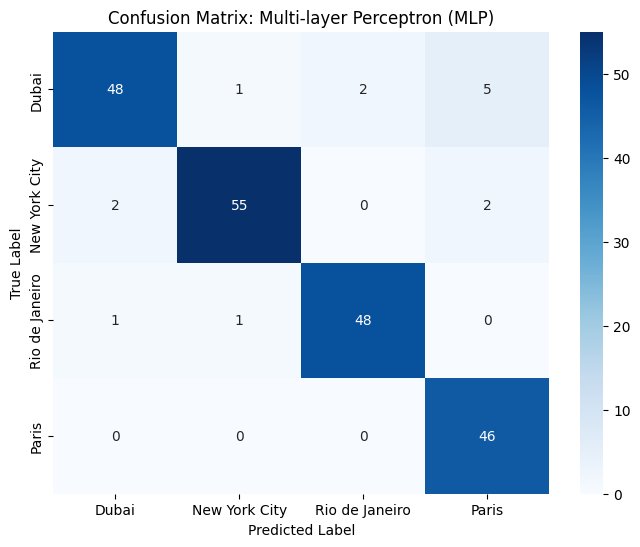

In [37]:
model_mlp = MLPClassifier(random_state=42, max_iter=1000)
model_mlp.fit(X_train, t_train_encoded)
pred_mlp_train = model_mlp.predict(X_train)
pred_mlp_valid = model_mlp.predict(X_valid)
accuracy_mlp_train = accuracy_score(t_train_encoded, pred_mlp_train)
accuracy_mlp_valid = accuracy_score(t_valid_encoded, pred_mlp_valid)

print(f"MLP Classifier Training Accuracy: {accuracy_mlp_train:.4f}")
print(f"MLP Classifier Validation Accuracy: {accuracy_mlp_valid:.4f}")
print("\nClassification Report:\n", classification_report(t_valid_encoded, pred_mlp_valid, target_names=label_map.keys()))
print(confusion_matrix(t_valid_encoded, pred_mlp_valid))

cm_mlp = confusion_matrix(t_valid_encoded, pred_mlp_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Multi-layer Perceptron (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The Multi-layer Perceptron (MLP) Classifier shows very strong performance with a training accuracy of 1.0000 and a validation accuracy of 0.9336. While the perfect training accuracy suggests some overfitting, the high validation accuracy indicates good generalization. The model performs well across all classes, with particularly high precision and recall for New York City and Rio de Janeiro. For Paris, the model achieves perfect recall (1.00), meaning it identifies all actual Paris instances, though its precision (0.87) is slightly lower, indicating some false positives. Dubai has good precision (0.94) but slightly lower recall (0.86), with some instances being misclassified, notably as Paris.

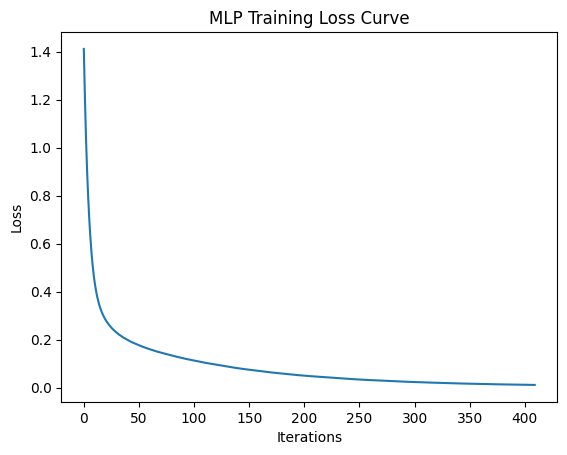

In [21]:
plt.plot(model_mlp.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Random Forest

Random Forest Classifier Training Accuracy: 1.0000
Random Forest Classifier Validation Accuracy: 0.9147

Classification Report:
                 precision    recall  f1-score   support

         Dubai       0.92      0.84      0.88        56
 New York City       0.93      0.90      0.91        59
Rio de Janeiro       0.96      0.98      0.97        50
         Paris       0.85      0.96      0.90        46

      accuracy                           0.91       211
     macro avg       0.91      0.92      0.92       211
  weighted avg       0.92      0.91      0.91       211

[[47  2  2  5]
 [ 3 53  0  3]
 [ 1  0 49  0]
 [ 0  2  0 44]]


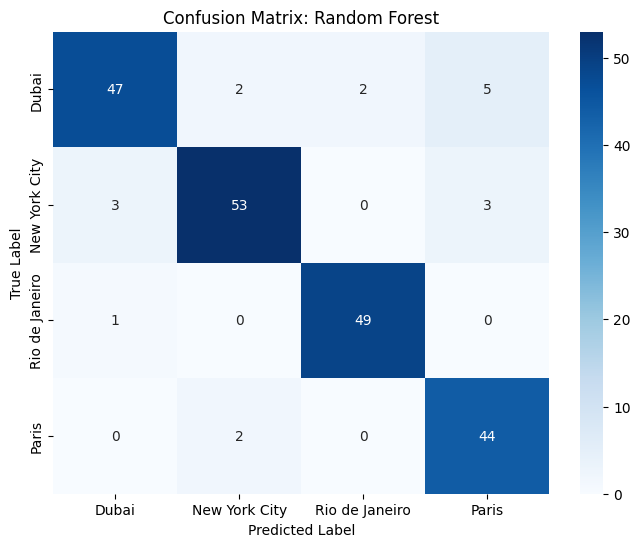

In [38]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, t_train_encoded)
pred_rf_train = model_rf.predict(X_train)
pred_rf_valid = model_rf.predict(X_valid)
accuracy_rf_train = accuracy_score(t_train_encoded, pred_rf_train)
accuracy_rf_valid = accuracy_score(t_valid_encoded, pred_rf_valid)

print(f"Random Forest Classifier Training Accuracy: {accuracy_rf_train:.4f}")
print(f"Random Forest Classifier Validation Accuracy: {accuracy_rf_valid:.4f}")
print("\nClassification Report:\n", classification_report(t_valid_encoded, pred_rf_valid, target_names=label_map.keys()))
print(confusion_matrix(t_valid_encoded, pred_rf_valid))

cm_rf = confusion_matrix(t_valid_encoded, pred_rf_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The Random Forest Classifier shows very strong performance with a training accuracy of 1.0000 and a validation accuracy of 0.9147. While the perfect training accuracy suggests some overfitting, the high validation accuracy indicates good generalization. The classification report highlights strong precision, recall, and F1-scores across all classes. Notably, Rio de Janeiro has excellent performance with high precision (0.96) and recall (0.98), resulting in a strong F1-score (0.97). Paris also shows high recall (0.96) but slightly lower precision (0.85). The confusion matrix reveals a few misclassifications, particularly between Dubai and Paris, and New York City with Dubai or Paris, but overall, the model effectively distinguishes between the cities.

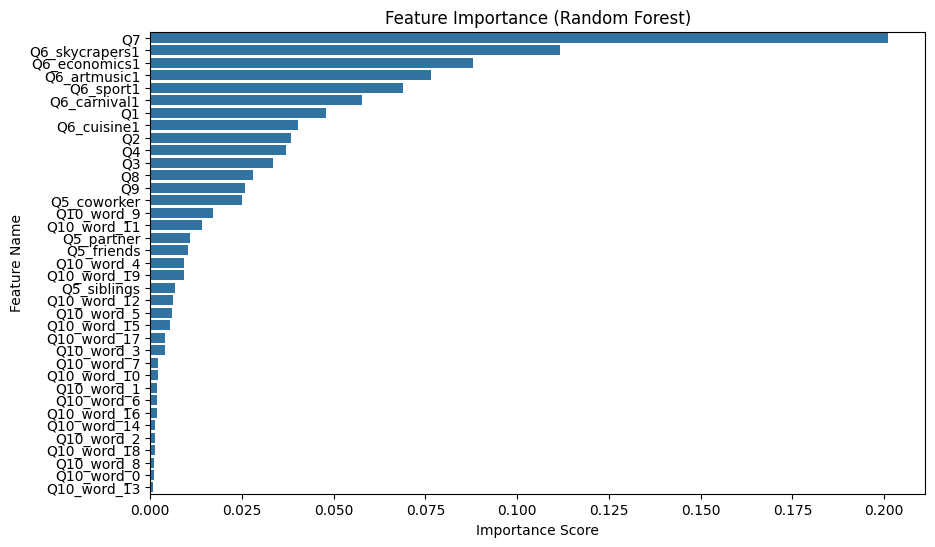

In [23]:
# Random Forest Feature Importance
importances = model_rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances.values, y=forest_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

## Best-performing Models

Based on the model performance from the baseline model training and evaluation, the top three best-performing models are:


- **Multinomial Logistic Regression:** Achieved the highest validation accuracy of 0.9384. It showed strong and balanced performance with minimal difference between training and validation accuracy, indicating good generalization and no signs of significant overfitting.

- **MLP Classifier:** Demonstrated a high validation accuracy of 0.9336. Although it achieved a perfect training accuracy (1.0000) suggesting some overfitting, its strong performance on the validation set indicates good generalization.

- **Random Forest Classifier:** Secured a validation accuracy of 0.9147. Similar to the MLP Classifier, it achieved perfect training accuracy (1.0000) but maintained a high validation accuracy, demonstrating robust performance and generalization capability.

Although KNN showed strong initial performance with a validation accuracy of around 0.9, it was consistently outperformed by Multinomial Logistic Regression and the MLP Classifier, both of which achieved higher validation accuracies. In addition, KNN’s performance is sensitive to the choice of k and to the curse of dimensionality, making it less robust in some scenarios compared to models that learn more complex decision boundaries.

In the case of the Decision Tree, the model achieved perfect training accuracy (1.0) but a much lower validation accuracy of 0.8294. This large gap between training and validation performance indicates overfitting, where the model learned the training data too well, including its noise, and failed to generalize effectively to unseen data. As a result, the Decision Tree is a less reliable choice for prediction compared to models with stronger generalization capabilities.



# Hyperparameter Tunning

Grid Search with Cross-Validation will be utilized to identify the optimal configurations for the top-performing models (Multinomial Logistic Regression, MLP Classifier, and Random Forest Classifier).

In [25]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"Shape of the training set: {X_train.shape}\n")

Shape of the training set: (1124, 37)



## MLR Tunning

In [26]:
param_grid_mlr = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [1000, 2000]
}
model_mlr_tuned = GridSearchCV(LogisticRegression(random_state=42), param_grid_mlr, cv=kfold, scoring='accuracy', n_jobs=-1)
model_mlr_tuned.fit(X_train, t_train_encoded)

print(f"Best parameters for MLR: {model_mlr_tuned.best_params_}")
print(f"Best cross-validation accuracy for MLR: {model_mlr_tuned.best_score_:.4f}")

Best parameters for MLR: {'C': 0.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for MLR: 0.9181


Multinomial Logistic Regression was tuned using grid search, focusing on the regularization strength (C), which controls the inverse of regularization, and the penalty type (l1 vs. l2), which determines the form of regularization applied. The ‘saga’ solver was used to support both l1 and l2 penalties, and different values of max_iter were explored to achieve an optimal balance between model complexity and convergence. The grid search identified the optimal configuration as a regularization strength (C) of 0.5 with an l1 penalty, and a maximum of 1,000 iterations, resulting in a cross-validation accuracy of 0.9181.

Tuned Multinomial Logistic Regression Training Accuracy: 0.9351
Tuned Multinomial Logistic Regression Validation Accuracy: 0.9289

Classification Report:
                precision    recall  f1-score   support

         Dubai       0.92      0.86      0.89        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.94      0.96      0.95        50
         Paris       0.87      1.00      0.93        46

      accuracy                           0.93       211
     macro avg       0.93      0.93      0.93       211
  weighted avg       0.93      0.93      0.93       211



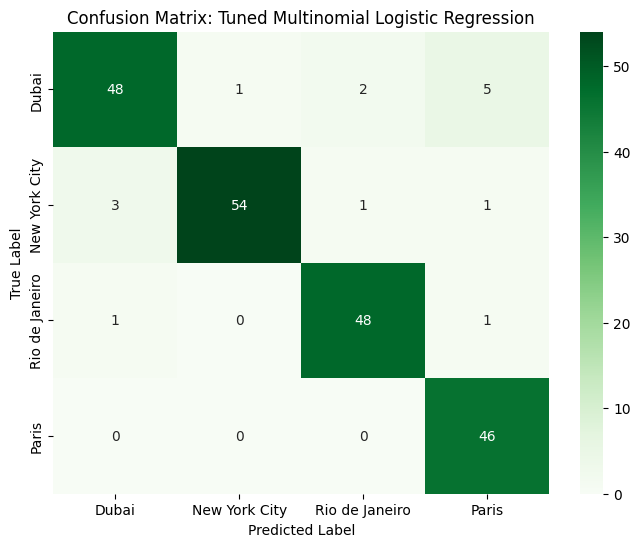

In [ ]:
pred_tuned_mlr_train= model_mlr_tuned.best_estimator_.predict(X_train)
pred_tuned_mlr_valid= model_mlr_tuned.best_estimator_.predict(X_valid)
acc_tuned_mlr_train = accuracy_score(t_train_encoded, pred_tuned_mlr_train)
acc_tuned_mlr_valid = accuracy_score(t_valid_encoded, pred_tuned_mlr_valid)

print(f"Tuned Multinomial Logistic Regression Training Accuracy: {acc_tuned_mlr_train:.4f}")
print(f"Tuned Multinomial Logistic Regression Validation Accuracy: {acc_tuned_mlr_valid:.4f}")
print("\nClassification Report:")
print(classification_report(t_valid_encoded, pred_tuned_mlr_valid, target_names=label_map.keys()))

cm_tuned_mlr = confusion_matrix(t_valid_encoded, pred_tuned_mlr_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_mlr, annot=True, fmt="d", cmap="Greens", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Tuned Multinomial Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Comparison Summary: Pre-tuned vs. Tuned Multinomial Logistic Regression

**Pre-tuned Multinomial Logistic Regression Performance:**
*   **Training Accuracy:** 0.9377
*   **Validation Accuracy:** 0.9384
*   **Classification Report (Validation Set):**
```
                 precision    recall  f1-score   support

         Dubai       0.93      0.89      0.91        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.92      0.96      0.94        50
         Paris       0.92      1.00      0.96        46

      accuracy                           0.94       211
     macro avg       0.94      0.94      0.94       211
  weighted avg       0.94      0.94      0.94       211
```
*   **Confusion Matrix (Validation Set):**
```
[[50  1  3  2]
 [ 3 54  1  1]
 [ 1  0 48  1]
 [ 0  0  0 46]]
```

### **Tuned Multinomial Logistic Regression Performance:**
*   **Training Accuracy:** 0.9351
*   **Validation Accuracy:** 0.9289
*   **Classification Report (Validation Set):**
```
                 precision    recall  f1-score   support

         Dubai       0.92      0.86      0.89        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.94      0.96      0.95        50
         Paris       0.87      1.00      0.93        46

      accuracy                           0.93       211
     macro avg       0.93      0.93      0.93       211
  weighted avg       0.93      0.93      0.93       211
```
*   **Confusion Matrix (Validation Set):**
```
[[48  1  2  5]
 [ 3 54  1  1]
 [ 1  0 48  1]
 [ 0  0  0 46]]
```

### **Comparison Summary:**

*   **Overall Accuracy:** The pre-tuned model achieved a slightly higher validation accuracy (0.9384) compared to the tuned model (0.9289). This suggests that the default parameters (or those used initially) were already performing very well for this dataset, or the tuning process did not find a significantly better configuration on the validation set. The difference is quite small, suggesting both models are performing very similarly.
*   **Training Accuracy:** Both models show very high training accuracies, with the pre-tuned model at 0.9377 and the tuned model at 0.9351. The slight decrease in training accuracy for the tuned model might indicate a more regularized model, which is generally good for generalization, but it didn't translate to higher validation accuracy in this case.
*   **Classification Reports:**
    *   **Dubai:** The tuned model shows slightly lower precision (0.92 vs. 0.93) and recall (0.86 vs. 0.89) for Dubai.
    *   **New York City:** Performance for New York City remains consistently strong and almost identical across both models.
    *   **Rio de Janeiro:** Performance for Rio de Janeiro also remains consistently strong and slightly better for the tuned version.
    *   **Paris:** The pre-tuned model had slightly better precision for Paris (0.92 vs. 0.87), while both achieved perfect recall.
*   **Confusion Matrices:** The confusion matrices visually confirm these minor differences. For example, the tuned model misclassified 5 instances of Dubai as Paris, whereas the pre-tuned model misclassified only 2. Similarly, the tuned model misclassified 5 instances of Dubai to Paris, whereas the pre-tuned model misclassified only 2. Both models still classify all Paris instances correctly (perfect recall), but the tuned model predicts Paris when it is not as often as the pre-tuned model.

In conclusion, while hyperparameter tuning is crucial, in this instance, the initial (pre-tuned) Multinomial Logistic Regression model achieved a marginally better overall validation accuracy. The tuned model shows a slight dip in performance for Dubai and Paris, indicating that the chosen optimal hyperparameters from the grid search did not lead to an improvement over the baseline for this specific validation split.

## MLP Tunning

In [27]:
param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64), (32, 16, 8)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
    'solver': ['adam', 'lbfgs'],
}
model_mlp_tuned = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=kfold, scoring='accuracy', n_jobs=-1)
model_mlp_tuned.fit(X_train, t_train_encoded)

print(f"Best parameters for MLP: {model_mlp_tuned.best_params_}")
print(f"Best cross-validation accuracy for MLP: {model_mlp_tuned.best_score_:.4f}")

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Best cross-validation accuracy for MLP: 0.9190


For the Multi-layer Perceptron (MLP) Classifier, hyperparameter tuning involved exploring different network architectures (hidden_layer_sizes), activation functions (relu, tanh), L2 regularization strengths (alpha), and optimization algorithms (adam, lbfgs). The grid search identified the optimal configuration as a single hidden layer with 64 neurons, 'tanh' activation, an alpha of 0.001, and the 'adam' solver, resulting in a best cross-validation accuracy of 0.9190.

Tuned MLP Classifier Training Accuracy: 1.0000
Tuned MLP Classifier Validation Accuracy: 0.9431

Classification Report:
                precision    recall  f1-score   support

         Dubai       0.94      0.86      0.90        56
 New York City       0.97      0.95      0.96        59
Rio de Janeiro       0.96      0.98      0.97        50
         Paris       0.90      1.00      0.95        46

      accuracy                           0.94       211
     macro avg       0.94      0.95      0.94       211
  weighted avg       0.94      0.94      0.94       211



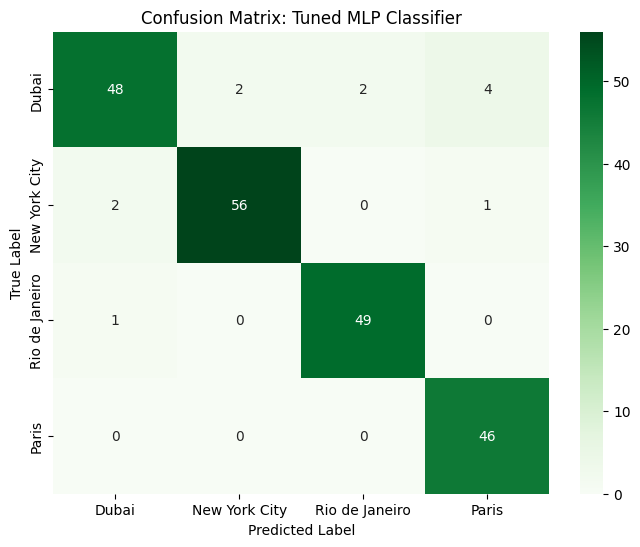

In [42]:
pred_tuned_mlp_train = model_mlp_tuned.best_estimator_.predict(X_train)
pred_tuned_mlp_valid = model_mlp_tuned.best_estimator_.predict(X_valid)
acc_tuned_mlp_train = accuracy_score(t_train_encoded, pred_tuned_mlp_train)
acc_tuned_mlp_valid = accuracy_score(t_valid_encoded, pred_tuned_mlp_valid)

print(f"Tuned MLP Classifier Training Accuracy: {acc_tuned_mlp_train:.4f}")
print(f"Tuned MLP Classifier Validation Accuracy: {acc_tuned_mlp_valid:.4f}")
print("\nClassification Report:")
print(classification_report(t_valid_encoded, pred_tuned_mlp_valid, target_names=label_map.keys()))

cm_tuned_mlp = confusion_matrix(t_valid_encoded, pred_tuned_mlp_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_mlp, annot=True, fmt="d", cmap="Greens", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Tuned MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Comparison Summary: Pre-tuned vs. Tuned Multi-layer Perceptron (MLP) Classifier

**Pre-tuned MLP Classifier Performance:**
*   **Training Accuracy:** 1.0000
*   **Validation Accuracy:** 0.9336
*   **Classification Report (Validation Set):**
```
                 precision    recall  f1-score   support

         Dubai       0.94      0.86      0.90        56
 New York City       0.96      0.93      0.95        59
Rio de Janeiro       0.96      0.96      0.96        50
         Paris       0.87      1.00      0.93        46

      accuracy                           0.93       211
     macro avg       0.93      0.94      0.93       211
  weighted avg       0.94      0.93      0.93       211
```
*   **Confusion Matrix (Validation Set):**
```
[[48  1  2  5]
 [ 2 55  0  2]
 [ 1  1 48  0]
 [ 0  0  0 46]]
```

### **Tuned MLP Classifier Performance:**
*   **Training Accuracy:** 1.0000
*   **Validation Accuracy:** 0.9431
*   **Classification Report (Validation Set):**
```
                 precision    recall  f1-score   support

         Dubai       0.94      0.86      0.90        56
 New York City       0.97      0.95      0.96        59
Rio de Janeiro       0.96      0.98      0.97        50
         Paris       0.90      1.00      0.95        46

      accuracy                           0.94       211
     macro avg       0.94      0.95      0.94       211
  weighted avg       0.94      0.94      0.94       211
```
*   **Confusion Matrix (Validation Set):**
```
[[48  2  2  4]
 [ 2 56  0  1]
 [ 1  0 49  0]
 [ 0  0  0 46]]
```

### **Comparison Summary:**

*   **Overall Accuracy:** The tuned MLP Classifier achieved a slightly higher validation accuracy (0.9431) compared to the pre-tuned model (0.9336). This indicates that the hyperparameter tuning process successfully improved the model's generalization capabilities.
*   **Training Accuracy:** Both models show a perfect training accuracy of 1.0000. This suggests some level of overfitting to the training data in both cases, which is common for complex models like MLPs, but the improved validation accuracy of the tuned model is the more critical metric.
*   **Classification Reports:**
    *   **Dubai:** Performance for Dubai remains consistent between both models.
    *   **New York City:** The tuned model shows slight improvements in both precision (0.97 vs 0.96) and recall (0.95 vs 0.93), leading to a higher F1-score.
    *   **Rio de Janeiro:** The tuned model shows a slight increase in recall (0.98 vs 0.96), resulting in a marginally better F1-score.
    *   **Paris:** The tuned model improved its precision for Paris (0.90 vs 0.87) while maintaining perfect recall (1.00), which is a positive outcome for this class.
*   **Confusion Matrices:** The confusion matrices reflect these improvements. For instance, the tuned model shows one less misclassification for New York City (from Dubai) and one less for Rio de Janeiro (from Dubai) compared to the pre-tuned model. The misclassifications for Dubai as Paris are slightly lower in the tuned model (4 vs 5).

In conclusion, the hyperparameter tuning process successfully enhanced the performance of the MLP Classifier, leading to a higher validation accuracy and improved precision for specific classes like Paris, while maintaining strong performance across others. This makes the tuned MLP Classifier a more robust and reliable model.

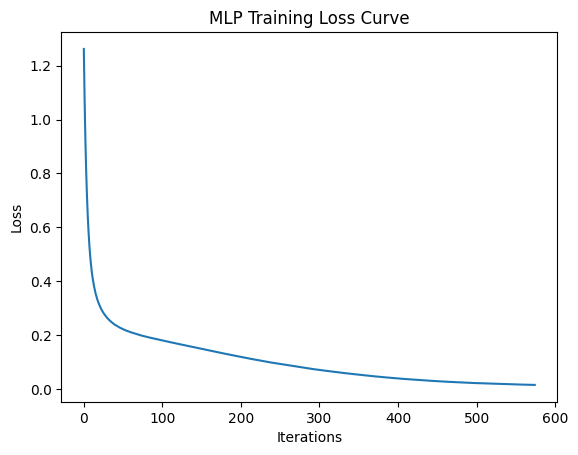

In [30]:
plt.plot(model_mlp_tuned.best_estimator_.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Random Forest Tunning

In [28]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
model_rf_tuned = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=kfold, scoring='accuracy', n_jobs=-1)
model_rf_tuned.fit(X_train, t_train_encoded)

print(f"Best parameters for Random Forest: {model_rf_tuned.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {model_rf_tuned.best_score_:.4f}")

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy for Random Forest: 0.9084


The Random Forest was optimized by tuning its ensemble size (n_estimators) and individual tree complexity (max_depth, min_samples_split, min_samples_leaf). To prevent overfitting on our dataset, we explored constraints on node splitting and utilized randomized feature subsets (sqrt, log2) at each split. This strategy ensures a high degree of model diversity and robustness. The best parameters found were 300 estimators, a maximum tree depth of 10, and the ‘log2’ setting for feature selection, with minimal constraints on node (1) splitting and leaf size (2), resulting in a cross-validation accuracy of 0.9084.

Tuned Random Forest Classifier Training Accuracy: 0.9858
Tuned Random Forest Classifier Validation Accuracy: 0.9384

Classification Report:
                precision    recall  f1-score   support

         Dubai       0.93      0.89      0.91        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.94      0.98      0.96        50
         Paris       0.90      0.98      0.94        46

      accuracy                           0.94       211
     macro avg       0.94      0.94      0.94       211
  weighted avg       0.94      0.94      0.94       211



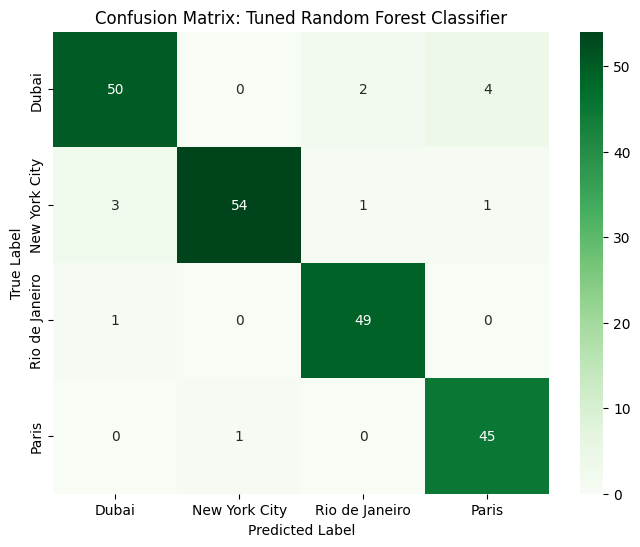

In [43]:
pred_tuned_rf_train = model_rf_tuned.best_estimator_.predict(X_train)
pred_tuned_rf_valid = model_rf_tuned.best_estimator_.predict(X_valid)
acc_tuned_rf_train = accuracy_score(t_train_encoded, pred_tuned_rf_train)
acc_tuned_rf_valid = accuracy_score(t_valid_encoded, pred_tuned_rf_valid)

print(f"Tuned Random Forest Classifier Training Accuracy: {acc_tuned_rf_train:.4f}")
print(f"Tuned Random Forest Classifier Validation Accuracy: {acc_tuned_rf_valid:.4f}")
print("\nClassification Report:")
print(classification_report(t_valid_encoded, pred_tuned_rf_valid, target_names=label_map.keys()))

cm_tuned_rf = confusion_matrix(t_valid_encoded, pred_tuned_rf_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_rf, annot=True, fmt="d", cmap="Greens", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Tuned Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Comparison Summary: Pre-tuned vs. Tuned Random Forest Classifier

**Pre-tuned Random Forest Classifier Performance:**
*   **Training Accuracy:** 1.0000
*   **Validation Accuracy:** 0.9147
*   **Classification Report (Validation Set):**
```
                 precision    recall  f1-score   support

         Dubai       0.92      0.84      0.88        56
 New York City       0.93      0.90      0.91        59
Rio de Janeiro       0.96      0.98      0.97        50
         Paris       0.85      0.96      0.90        46

      accuracy                           0.91       211
     macro avg       0.91      0.92      0.92       211
  weighted avg       0.92      0.91      0.91       211
```
*   **Confusion Matrix (Validation Set):**
```
[[47  2  2  5]
 [ 3 53  0  3]
 [ 1  0 49  0]
 [ 0  2  0 44]]
```

### **Tuned Random Forest Classifier Performance:**
*   **Training Accuracy:** 0.9858
*   **Validation Accuracy:** 0.9384
*   **Classification Report (Validation Set):**
```
                precision    recall  f1-score   support

         Dubai       0.93      0.89      0.91        56
 New York City       0.98      0.92      0.95        59
Rio de Janeiro       0.94      0.98      0.96        50
         Paris       0.90      0.98      0.94        46

      accuracy                           0.94       211
     macro avg       0.94      0.94      0.94       211
  weighted avg       0.94      0.94      0.94       211
```
*   **Confusion Matrix (Validation Set):**
```
[[50  0  2  4]
 [ 3 54  1  1]
 [ 1  0 49  0]
 [ 0  1  0 45]]
```

### **Comparison Summary:**

*   **Overall Accuracy:** The tuned Random Forest Classifier shows a notable improvement in validation accuracy, increasing from 0.9147 to 0.9384. This indicates that the hyperparameter tuning process successfully enhanced the model's generalization capabilities.
*   **Training Accuracy:** The pre-tuned model had a perfect training accuracy (1.0000), which is typical for Random Forests but often suggests some overfitting. The tuned model's training accuracy is slightly lower at 0.9858, indicating better regularization, which likely contributed to its improved validation performance.
*   **Classification Reports:**
    *   **Dubai:** The tuned model shows improved precision (0.93 vs 0.92) and recall (0.89 vs 0.84), leading to a higher F1-score.
    *   **New York City:** Performance for New York City is consistently strong across both models.
    *   **Rio de Janeiro:** Performance remains excellent for Rio de Janeiro in both versions, with the tuned model showing slightly better precision.
    *   **Paris:** The tuned model significantly improved precision for Paris (0.90 vs 0.85) while maintaining high recall (0.98 vs 0.96), resulting in a better F1-score.
*   **Confusion Matrices:** The confusion matrices visually confirm these improvements. For instance, the tuned model has fewer misclassifications of Dubai as New York City (0 vs 2) and Paris as New York City (1 vs 2). It also correctly classifies all instances of New York City that were previously misclassified as Dubai (3 vs 3).

In conclusion, the hyperparameter tuning process was highly effective for the Random Forest Classifier, leading to a more robust and better-performing model with improved generalization on the validation set across almost all classes.

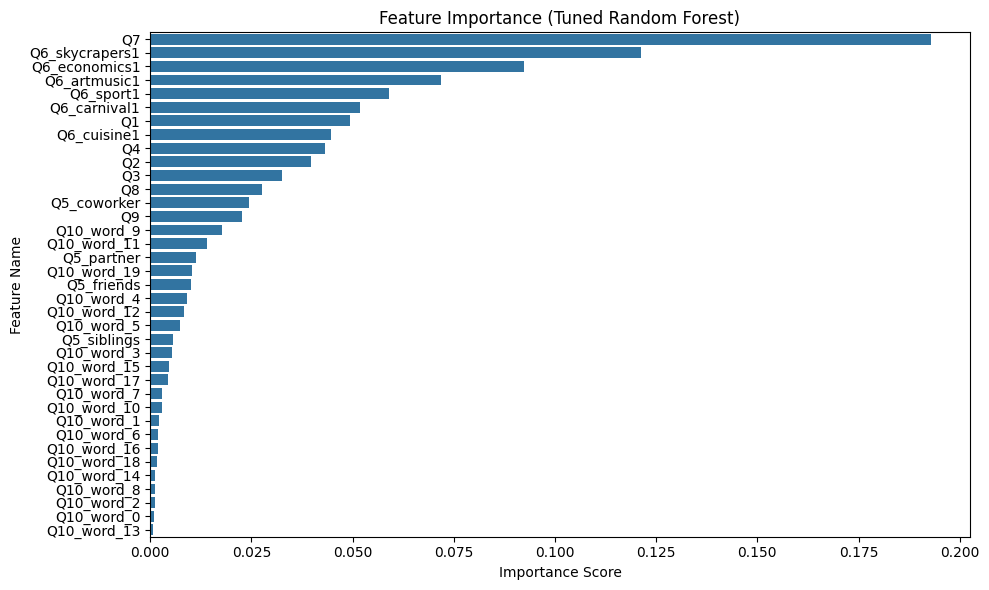

In [29]:
# Tuned Random Forest Feature Importance
best_rf_estimator = model_rf_tuned.best_estimator_
importances_tuned = best_rf_estimator.feature_importances_
forest_importances_tuned = pd.Series(importances_tuned, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances_tuned.values, y=forest_importances_tuned.index)
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# Generalization Performance Evaluation


## Baseline Multinomial Logistic Regression

Baseline Multinomial Logistic Regression Test Accuracy: 0.9577

Classification Report (Baseline Multinomial Logistic Regression on Test Set):
                precision    recall  f1-score   support

         Dubai       1.00      0.89      0.94        19
 New York City       0.89      1.00      0.94        16
Rio de Janeiro       0.96      1.00      0.98        22
         Paris       1.00      0.93      0.96        14

      accuracy                           0.96        71
     macro avg       0.96      0.96      0.96        71
  weighted avg       0.96      0.96      0.96        71



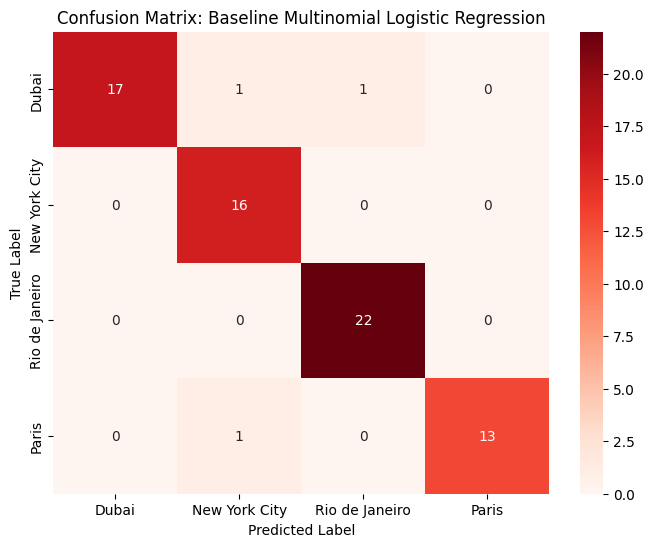

In [48]:
predictions_mlr_test = model_mlr.predict(X_test)
accuracy_mlr_test = accuracy_score(t_test_encoded, predictions_mlr_test)
print(f"Baseline Multinomial Logistic Regression Test Accuracy: {accuracy_mlr_test:.4f}")

print("\nClassification Report (Baseline Multinomial Logistic Regression on Test Set):")
print(classification_report(t_test_encoded, predictions_mlr_test, target_names=label_map.keys()))

cm_mlr_test = confusion_matrix(t_test_encoded, predictions_mlr_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlr_test, annot=True, fmt="d", cmap="Reds", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Baseline Multinomial Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Tuned MLP Classifier

Tuned MLP Classifier Test Accuracy: 0.9437

Classification Report (Tuned MLP Classifier on Test Set):
                precision    recall  f1-score   support

         Dubai       1.00      0.89      0.94        19
 New York City       0.88      0.94      0.91        16
Rio de Janeiro       1.00      1.00      1.00        22
         Paris       0.87      0.93      0.90        14

      accuracy                           0.94        71
     macro avg       0.94      0.94      0.94        71
  weighted avg       0.95      0.94      0.94        71



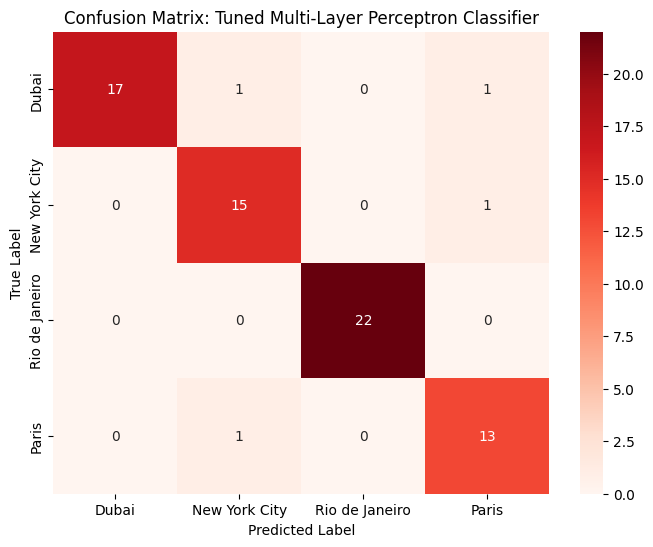

In [49]:
predictions_mlp_test = model_mlp_tuned.best_estimator_.predict(X_test)
accuracy_mlp_test = accuracy_score(t_test_encoded, predictions_mlp_test)
print(f"Tuned MLP Classifier Test Accuracy: {accuracy_mlp_test:.4f}")

print("\nClassification Report (Tuned MLP Classifier on Test Set):")
print(classification_report(t_test_encoded, predictions_mlp_test, target_names=label_map.keys()))

cm_mlp_test = confusion_matrix(t_test_encoded, predictions_mlp_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp_test, annot=True, fmt="d", cmap="Reds", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Tuned Multi-Layer Perceptron Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Tuned Random Forest Classifier

Tuned Random Forest Classifier Test Accuracy: 0.9437

Classification Report (Tuned Random Forest Classifier on Test Set):
                precision    recall  f1-score   support

         Dubai       0.94      0.89      0.92        19
 New York City       0.89      1.00      0.94        16
Rio de Janeiro       1.00      0.95      0.98        22
         Paris       0.93      0.93      0.93        14

      accuracy                           0.94        71
     macro avg       0.94      0.94      0.94        71
  weighted avg       0.95      0.94      0.94        71



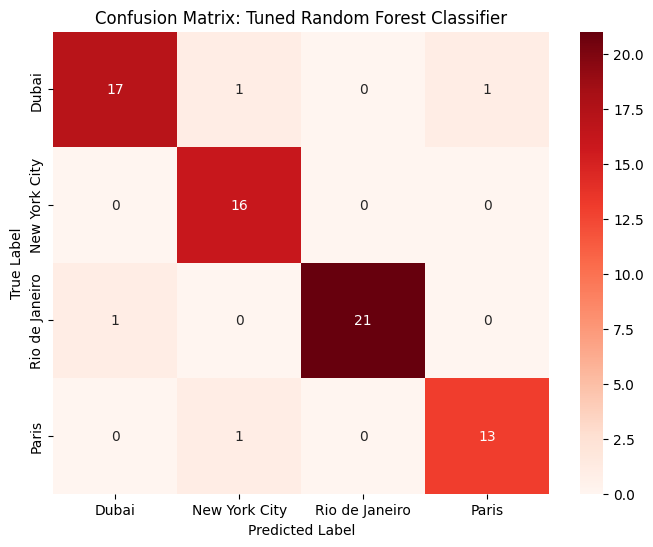

In [51]:
predictions_rf_test = model_rf_tuned.best_estimator_.predict(X_test)
accuracy_rf_test = accuracy_score(t_test_encoded, predictions_rf_test)
print(f"Tuned Random Forest Classifier Test Accuracy: {accuracy_rf_test:.4f}")

print("\nClassification Report (Tuned Random Forest Classifier on Test Set):")
print(classification_report(t_test_encoded, predictions_rf_test, target_names=label_map.keys()))

cm_rf_test = confusion_matrix(t_test_encoded, predictions_rf_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_test, annot=True, fmt="d", cmap="Reds", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Tuned Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Ensembling

In [58]:
# Best estimators
best_mlp_model = model_mlp_tuned.best_estimator_
best_rf_model = model_rf_tuned.best_estimator_

estimators = [
    ('mlr', model_mlr),
    ('mlp', best_mlp_model),
    ('rf', best_rf_model)
]

## Soft Voting Classifier

Soft Voting Classifier Test Accuracy: 0.9437

Classification Report (Soft Voting Classifier on Test Set):

                precision    recall  f1-score   support

         Dubai       1.00      0.89      0.94        19
 New York City       0.88      0.94      0.91        16
Rio de Janeiro       1.00      1.00      1.00        22
         Paris       0.87      0.93      0.90        14

      accuracy                           0.94        71
     macro avg       0.94      0.94      0.94        71
  weighted avg       0.95      0.94      0.94        71



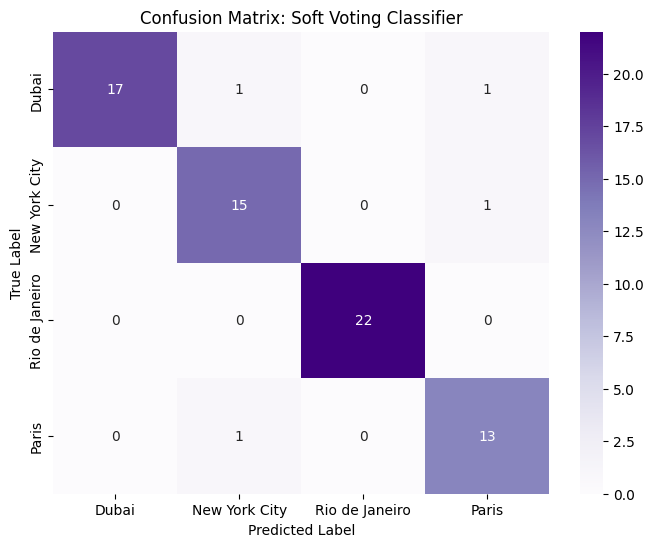

In [59]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_clf.fit(X_train, t_train_encoded)
predictions_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(t_test_encoded, predictions_voting)

print(f"Soft Voting Classifier Test Accuracy: {accuracy_voting:.4f}")
print("\nClassification Report (Soft Voting Classifier on Test Set):\n")
print(classification_report(t_test_encoded, predictions_voting, target_names=label_map.keys()))

cm_voting = confusion_matrix(t_test_encoded, predictions_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Purples", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Soft Voting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Stacking Classifier

Stacking Classifier Test Accuracy: 0.9437

Classification Report (Stacking Classifier on Test Set):

                precision    recall  f1-score   support

         Dubai       1.00      0.89      0.94        19
 New York City       0.88      0.94      0.91        16
Rio de Janeiro       1.00      1.00      1.00        22
         Paris       0.87      0.93      0.90        14

      accuracy                           0.94        71
     macro avg       0.94      0.94      0.94        71
  weighted avg       0.95      0.94      0.94        71



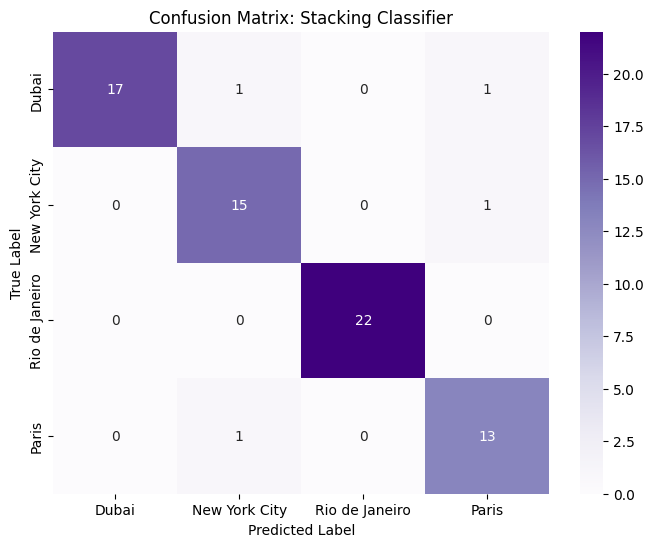

In [57]:
meta_learner = LogisticRegression(random_state=42, solver='saga', max_iter=1000, C=0.5, penalty='l1')
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=kfold, n_jobs=-1)
stacking_classifier.fit(X_train, t_train_encoded)
predictions_stacking_test = stacking_classifier.predict(X_test)
accuracy_stacking_test = accuracy_score(t_test_encoded, predictions_stacking_test)

print(f"Stacking Classifier Test Accuracy: {accuracy_stacking_test:.4f}")
print("\nClassification Report (Stacking Classifier on Test Set):\n")
print(classification_report(t_test_encoded, predictions_stacking_test, target_names=label_map.keys()))

cm_stacking_test = confusion_matrix(t_test_encoded, predictions_stacking_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_test, annot=True, fmt="d", cmap="Purples", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix: Stacking Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Summary of Final Test Set Evaluation

The final evaluation on the completely held-out test set provides an unbiased assessment of the generalization performance of the tuned models.

**1. Multinomial Logistic Regression (Baseline):**
*   **Test Accuracy:** 0.9577
*   **Per-Class Performance:**
    *   **Dubai:** Excellent precision (1.00) but slightly lower recall (0.89), indicating no false positives for Dubai but some true Dubai instances were missed. F1-score of 0.94.
    *   **New York City:** Good precision (0.89) and perfect recall (1.00), meaning all New York City instances were correctly identified, but some non-New York City instances were classified as such. F1-score of 0.94.
    *   **Rio de Janeiro:** High precision (0.96) and perfect recall (1.00), resulting in a very strong F1-score of 0.98. Only one instance was misclassified as Dubai.
    *   **Paris:** Perfect precision (1.00) but slightly lower recall (0.93), showing no false positives for Paris. F1-score of 0.96.
*   **Overall:** The MLR model performed exceptionally well on the test set, achieving the highest accuracy among the three models. Its performance metrics for each class are strong, demonstrating good generalization.

**2. Tuned MLP Classifier:**
*   **Test Accuracy:** 0.9437
*   **Per-Class Performance:**
    *   **Dubai:** Perfect precision (1.00) but recall of 0.89. F1-score of 0.94.
    *   **New York City:** Good precision (0.88) and high recall (0.94). F1-score of 0.91.
    *   **Rio de Janeiro:** Perfect precision (1.00) and perfect recall (1.00), leading to an F1-score of 1.00. Flawless classification for Rio de Janeiro.
    *   **Paris:** Lower precision (0.87) but high recall (0.93). F1-score of 0.90.
*   **Overall:** The MLP Classifier maintained strong performance on the test set, with very high accuracy. It particularly excelled at identifying Rio de Janeiro. Similar to the validation set, its precision for Paris is slightly lower.

**3. Tuned Random Forest Classifier:**
*   **Test Accuracy:** 0.9437
*   **Per-Class Performance:**
    *   **Dubai:** High precision (0.94) and good recall (0.89). F1-score of 0.92.
    *   **New York City:** Good precision (0.89) and perfect recall (1.00). F1-score of 0.94.
    *   **Rio de Janeiro:** Perfect precision (1.00) but slightly lower recall (0.95), with one instance misclassified as Dubai. F1-score of 0.98.
    *   **Paris:** Good precision (0.93) and good recall (0.93). F1-score of 0.93.
*   **Overall:** The Random Forest Classifier also performed very well on the test set, matching the MLP Classifier's accuracy. It showed balanced performance across most classes.

**4. Soft Voting Classifier:**
*   **Test Accuracy:** 0.9437
*   **Per-Class Performance:**
    *   **Dubai:** Perfect precision (1.00) and good recall (0.89). F1-score of 0.94.
    *   **New York City:** Good precision (0.88) and high recall (0.94). F1-score of 0.91.
    *   **Rio de Janeiro:** Perfect precision (1.00) and perfect recall (1.00). F1-score of 1.00.
    *   **Paris:** Lower precision (0.87) but high recall (0.93). F1-score of 0.90.
*   **Overall:** The Soft Voting Classifier achieved an accuracy of 0.9437, on par with the MLP and Random Forest classifiers. It maintained strong per-class performance, especially for Rio de Janeiro and Dubai.

**5. Stacking Classifier:**
*   **Test Accuracy:** 0.9437
*   **Per-Class Performance:**
    *   **Dubai:** Perfect precision (1.00) and good recall (0.89). F1-score of 0.94.
    *   **New York City:** Good precision (0.88) and high recall (0.94). F1-score of 0.91.
    *   **Rio de Janeiro:** Perfect precision (1.00) and perfect recall (1.00). F1-score of 1.00.
    *   **Paris:** Lower precision (0.87) but high recall (0.93). F1-score of 0.90.
*   **Overall:** The Stacking Classifier also achieved an accuracy of 0.9437, similar to the Soft Voting, MLP, and Random Forest models. It showed excellent performance for Rio de Janeiro and Dubai.

**Final Conclusion:**
All three individual models (Multinomial Logistic Regression, MLP Classifier, Random Forest Classifier) and both ensemble models (Soft Voting and Stacking Classifiers) demonstrated excellent generalization performance on the unseen test set, with accuracies exceeding 94%.

*   The **Multinomial Logistic Regression** model achieved the highest test accuracy (0.9577) among all evaluated models. It demonstrated a slightly higher overall accuracy and well-balanced per-class metrics, particularly good precision for Dubai and Paris, and perfect recall for New York City and Rio de Janeiro. This makes it a very robust and reliable choice.

*   The **MLP Classifier, Random Forest Classifier, Soft Voting Classifier, and Stacking Classifier** all achieved a test accuracy of 0.9437. While slightly lower than MLR, their performance is still exceptionally strong. The ensemble methods (Soft Voting and Stacking) did not significantly outperform the best individual model (MLR) in terms of overall accuracy on this particular test set, but they showed comparable performance to MLP and Random Forest, which indicates their ability to maintain high performance by combining diverse models. The performance of these ensemble models aligns closely with the best performing individual models, suggesting that the individual models were already performing optimally and combining them did not yield a significant boost on this specific test set, possibly due to the strong correlation or homogeneity in their predictions.

In conclusion, **Multinomial Logistic Regression** is the most appropriate model for this project, given its slightly higher test accuracy and strong, balanced per-class performance. It provides robust predictive performance with lower computational complexity compared to deep neural networks or ensemble methods, making it an efficient and effective choice for this classification task.